# Promotion Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
promotion_train=pd.read_csv("D:\promotion_train.csv")
promotion_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
promotion_test=pd.read_csv("D:\promotion_test.csv")

In [4]:
promotion_train["education"]

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object

# Data Analysis

In [5]:
promotion_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

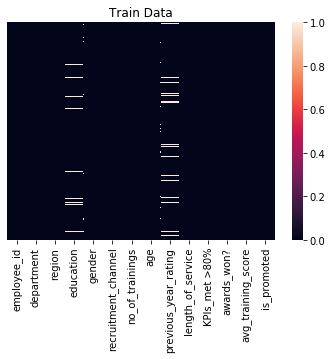

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Train Data")
sns.heatmap(promotion_train.isnull(),yticklabels=False)

In [7]:
promotion_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


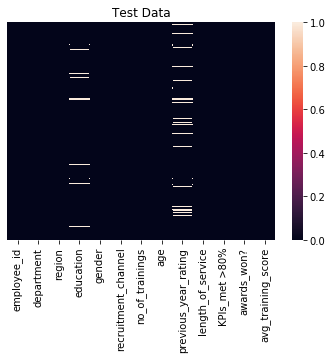

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Test Data")
sns.heatmap(promotion_test.isnull(),yticklabels=False)

In [9]:
promotion_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
promotion_train["is_promoted"].value_counts()


0    50140
1     4668
Name: is_promoted, dtype: int64

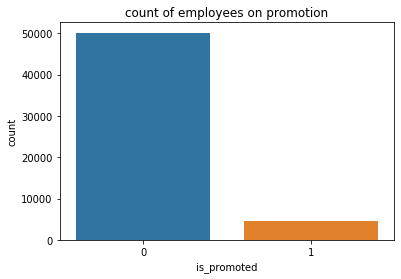

In [11]:
plt.title("count of employees on promotion")
sns.countplot(x="is_promoted",data=promotion_train)

In [12]:
promotion_train["gender"].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

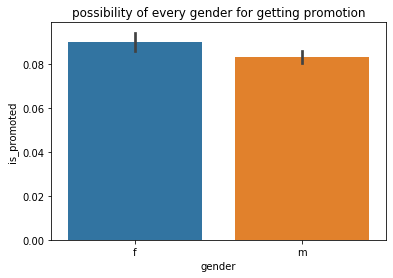

In [13]:
plt.title("possibility of every gender for getting promotion")
sns.barplot(promotion_train['gender'],promotion_train["is_promoted"])

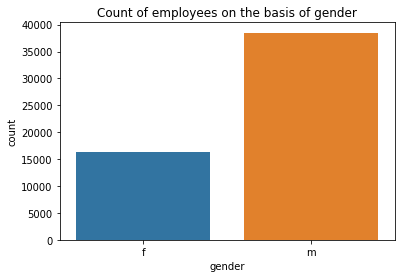

In [14]:
plt.title("Count of employees on the basis of gender")
sns.countplot(promotion_train['gender'])

In [15]:
x=pd.concat([promotion_train,promotion_test],axis=0)
x

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [16]:
x["employee_id"]

0        65438
1        65141
2         7513
3         2542
4        48945
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 78298, dtype: int64

In [17]:
promotion_train.drop("employee_id",axis=1,inplace=True)
employee_id_test=promotion_test["employee_id"]

In [18]:
print(promotion_train["department"].value_counts())
print(promotion_test["department"].value_counts())

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64


Text(0.5, 1.0, 'Average Probability of employees to get promoted in every sector per gender')

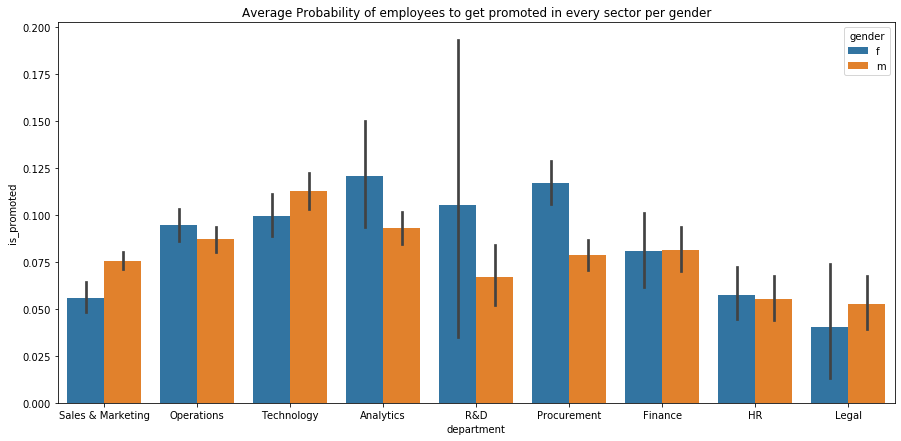

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.barplot(x="department",y="is_promoted",data=promotion_train,hue="gender")
plt.title("Average Probability of employees to get promoted in every sector per gender")

Text(0.5, 1.0, 'Average Probability of employees to get promoted in every sector')

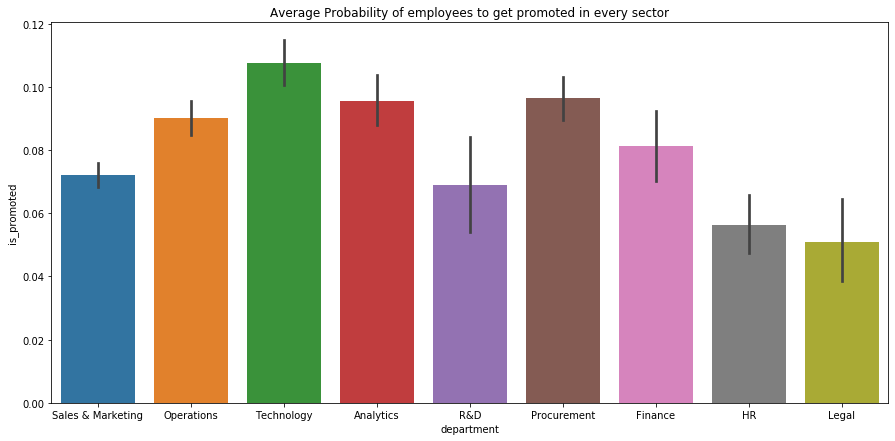

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.barplot(x="department",y="is_promoted",data=promotion_train)
plt.title("Average Probability of employees to get promoted in every sector")

In [21]:
print(promotion_train["region"].unique())
print(promotion_test["region"].unique())

['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']


Text(0.5, 1.0, 'Average Probability of employees to get promoted in every region')

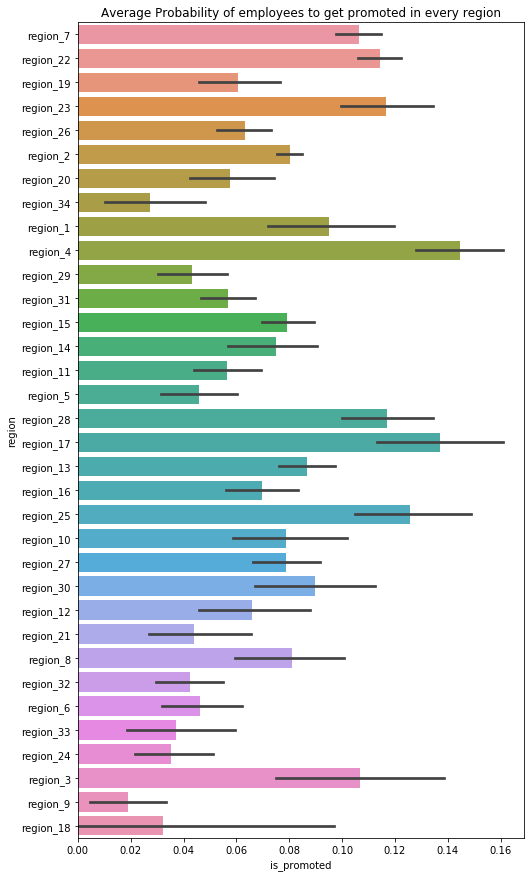

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,15))
sns.barplot(y="region",x="is_promoted",data=promotion_train)
plt.title("Average Probability of employees to get promoted in every region")

In [23]:
print(promotion_train["education"].value_counts())
print(promotion_test["education"].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64


Text(0.5, 1.0, 'Average Probability of employees to get promoted after getting education')

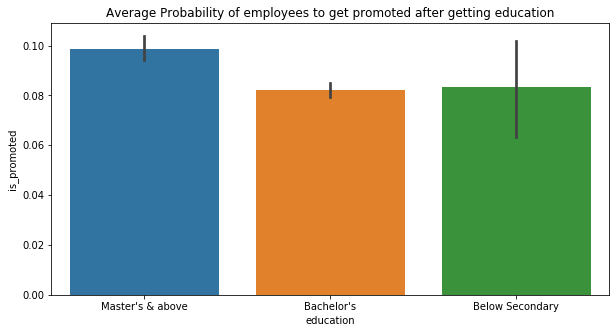

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x="education",y="is_promoted",data=promotion_train)
plt.title("Average Probability of employees to get promoted after getting education")

In [25]:
promotion_train["education"].replace({
    "Bachelor's":1,
    "Master's & above":2,
    "Below Secondary":0
},inplace=True)


In [26]:
promotion_test["education"].replace({
    "Bachelor's":1,
    "Master's & above":2,
    "Below Secondary":0
},inplace=True)

In [27]:
print(promotion_train["recruitment_channel"].value_counts())
print(promotion_test["recruitment_channel"].value_counts())

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64
other       13078
sourcing     9961
referred      451
Name: recruitment_channel, dtype: int64


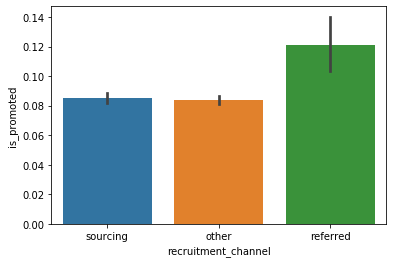

In [28]:
sns.barplot(x="recruitment_channel",data=promotion_train,y="is_promoted")

In [29]:
print(promotion_train["no_of_trainings"].value_counts())
print(promotion_test["no_of_trainings"].value_counts())

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64
1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
9        2
8        2
Name: no_of_trainings, dtype: int64


Text(0.5, 1.0, 'count of trainings of employees in the company distinguished by promotion of employees')

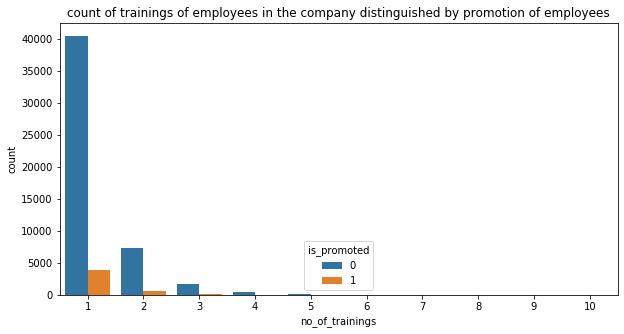

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x="no_of_trainings",data=promotion_train,hue="is_promoted")
plt.title("count of trainings of employees in the company distinguished by promotion of employees")

Text(0.5, 1.0, 'Average probability of getting promotion on the basis of number of trainings')

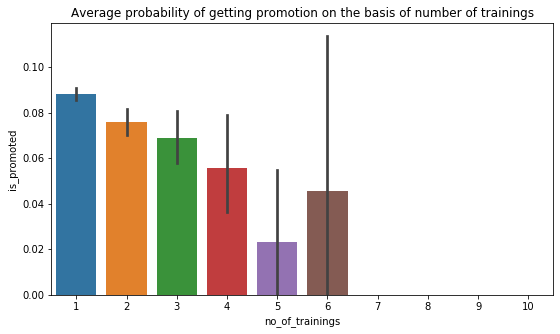

In [31]:
plt.figure(figsize=(9,5))
sns.barplot(x="no_of_trainings",data=promotion_train,y="is_promoted")
plt.title("Average probability of getting promotion on the basis of number of trainings")

In [32]:
print(promotion_train["age"].unique().max())
print(promotion_train["age"].unique().min())
print(promotion_test["age"].unique().max())
print(promotion_test["age"].unique().min())

60
20
60
20


Text(0.5, 1.0, 'Education of employees vs age  of employees')

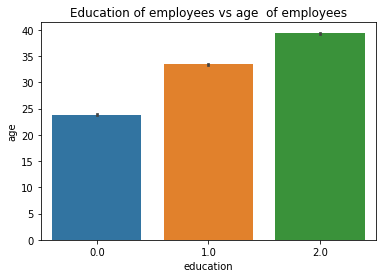

In [33]:
sns.barplot(x="education",y="age",data=promotion_train)
plt.title("Education of employees vs age  of employees")

In [34]:
print(promotion_train["previous_year_rating"].value_counts())
print(promotion_test["previous_year_rating"].value_counts())

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64


Text(0.5, 1.0, 'Average probability of promotion on the basis of previous year rating')

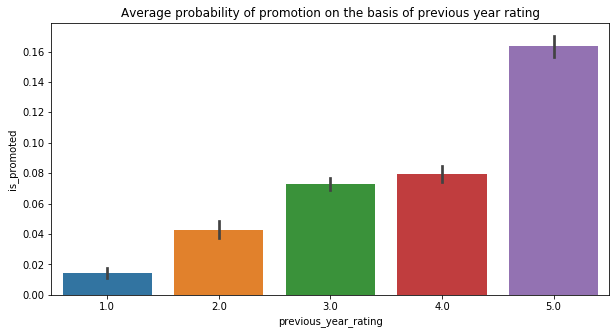

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x="previous_year_rating",y="is_promoted",data=promotion_train)
plt.title("Average probability of promotion on the basis of previous year rating")

In [36]:
print(promotion_train["length_of_service"].sort_values().unique())
print(promotion_train["length_of_service"].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 37]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 37]


Text(0.5, 1.0, 'Average probability of promotion on the basis of length of service')

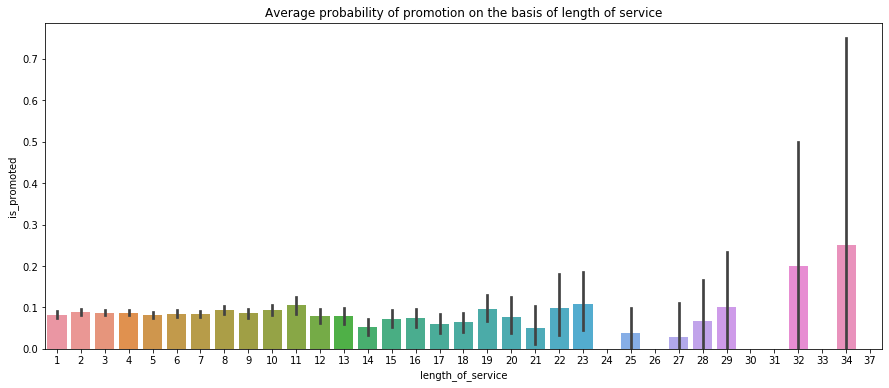

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(promotion_train["length_of_service"],promotion_train["is_promoted"])
plt.title("Average probability of promotion on the basis of length of service")

In [38]:
print(promotion_train["KPIs_met >80%"].value_counts())
print(promotion_test["KPIs_met >80%"].value_counts())

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64
0    15061
1     8429
Name: KPIs_met >80%, dtype: int64


Text(0.5, 1.0, 'Count of KPI of employees')

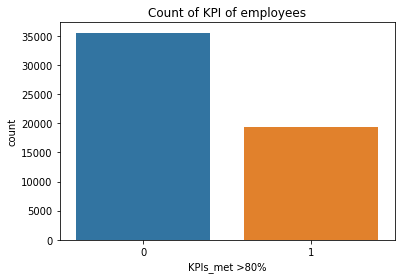

In [39]:
sns.countplot(promotion_train["KPIs_met >80%"])
plt.title("Count of KPI of employees")

Text(0.5, 1.0, 'Average probability of promotion on the basis of key performance indicators')

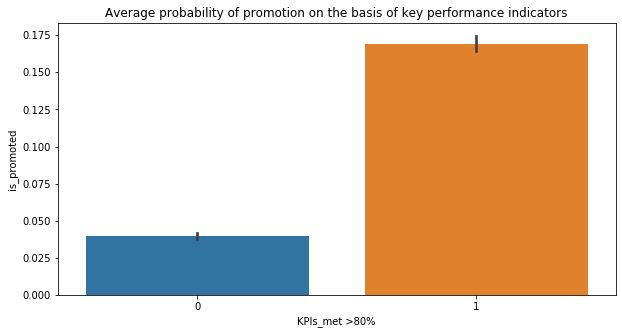

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(promotion_train["KPIs_met >80%"],promotion_train["is_promoted"])
plt.title("Average probability of promotion on the basis of key performance indicators")

In [41]:
print(promotion_train["awards_won?"].value_counts())
print(promotion_test["awards_won?"].value_counts())

0    53538
1     1270
Name: awards_won?, dtype: int64
0    22955
1      535
Name: awards_won?, dtype: int64


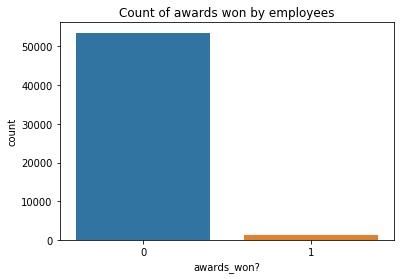

In [42]:
plt.title("Count of awards won by employees")
sns.countplot(promotion_train["awards_won?"])

Text(0.5, 1.0, 'Average probability of promotion on the basis of awards won by employees ')

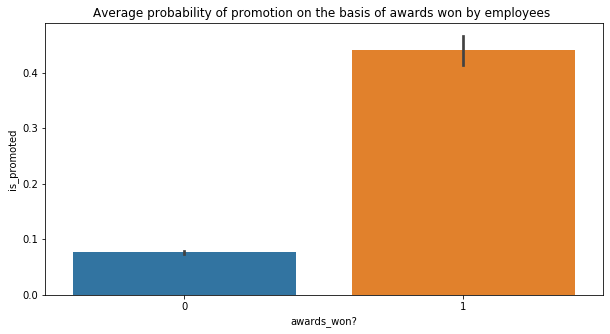

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(promotion_train["awards_won?"],promotion_train["is_promoted"])
plt.title("Average probability of promotion on the basis of awards won by employees ")

In [44]:
print(promotion_train['avg_training_score'].unique())
print(promotion_test['avg_training_score'].unique())

[49 60 50 73 85 59 63 83 54 77 80 84 51 46 75 57 70 68 79 44 72 61 48 58
 87 47 52 88 71 65 62 53 78 91 82 69 55 74 86 90 92 67 89 56 76 81 45 64
 39 94 93 66 95 42 96 40 99 43 97 41 98]
[77 51 47 65 61 68 57 85 75 76 50 46 52 82 58 56 64 80 83 62 87 55 88 90
 66 45 54 84 59 49 81 79 78 60 74 92 48 86 72 43 69 53 71 73 63 70 67 97
 95 89 94 44 91 93 96 98 99 42 41 40 39]


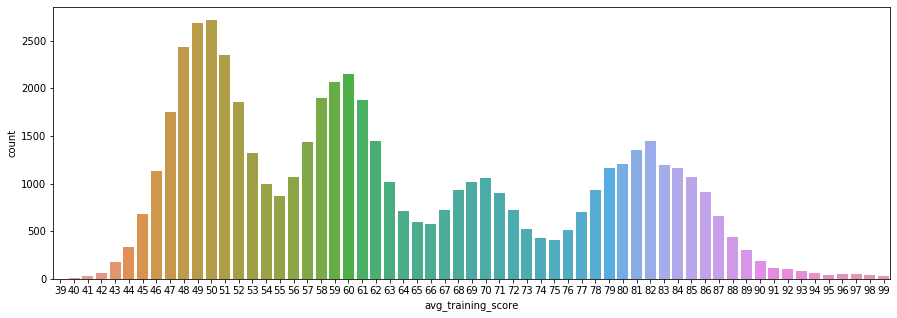

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(promotion_train['avg_training_score'])

Text(0.5, 1.0, 'Average probability of promotion on the basis of average training score of employees')

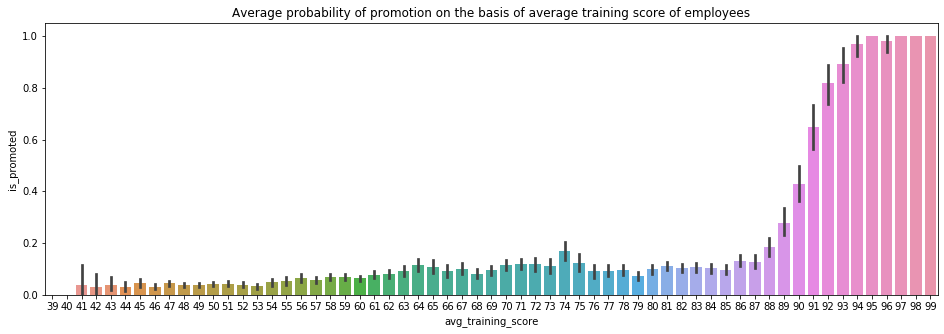

In [46]:
plt.figure(figsize=(16,5))
sns.barplot(promotion_train['avg_training_score'],promotion_train["is_promoted"])
plt.title("Average probability of promotion on the basis of average training score of employees")

# One hot encoding of train and test data

In [47]:
dummies_train=pd.get_dummies(promotion_train[['department', 'region', 'gender', 'recruitment_channel']],drop_first=True)
dummies_test=pd.get_dummies(promotion_test[['department', 'region', 'gender', 'recruitment_channel']],drop_first=True)

In [48]:
promotion_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [49]:
promotion_train=pd.concat([promotion_train[['education','no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']],dummies_train],axis=1)

In [50]:
promotion_test=pd.concat([promotion_test[['education','no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','KPIs_met >80%', 'awards_won?', 'avg_training_score']],dummies_test],axis=1)

# Train Test  and Split of train data

In [51]:
x=promotion_train.drop("is_promoted",axis=1)
y=promotion_train["is_promoted"]

In [52]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=12)

In [53]:
x_train

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
34194,1.0,1,42,3.0,6,0,0,48,0,0,...,0,0,0,0,0,0,0,1,0,1
2870,1.0,1,36,3.0,7,0,0,85,0,0,...,0,0,1,0,0,0,0,1,0,0
33301,1.0,1,30,3.0,7,0,0,78,0,0,...,0,0,0,1,0,0,0,0,0,0
36383,1.0,1,33,3.0,5,0,0,56,0,0,...,0,0,0,0,0,1,0,1,0,0
21976,2.0,1,33,1.0,6,0,0,46,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,NaN,1,43,1.0,13,0,0,51,0,0,...,0,0,0,0,0,0,0,1,0,0
40177,0.0,1,25,3.0,2,0,0,58,1,0,...,0,0,0,0,0,0,0,0,0,1
19709,1.0,1,30,NaN,1,1,0,48,0,0,...,0,0,0,0,0,0,0,1,0,0
38555,2.0,2,36,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
y_train

34194    0
2870     0
33301    0
36383    0
21976    0
        ..
36482    0
40177    0
19709    0
38555    0
14155    0
Name: is_promoted, Length: 43846, dtype: int64

In [55]:
x_test

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
52486,1.0,1,30,3.0,3,0,0,60,0,0,...,0,0,0,0,0,1,0,0,0,1
30567,1.0,1,42,3.0,2,1,0,54,0,0,...,0,0,0,0,0,0,0,1,0,1
51604,1.0,1,27,1.0,5,0,0,85,0,0,...,0,0,0,0,0,1,0,0,0,0
2139,NaN,1,35,4.0,2,0,1,71,0,0,...,0,0,0,0,1,0,0,1,0,1
18093,0.0,1,20,5.0,2,0,0,48,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,2.0,1,32,5.0,6,0,0,57,0,0,...,0,0,0,0,0,0,0,0,0,0
40272,1.0,1,28,3.0,3,0,0,56,0,0,...,0,0,0,0,0,0,0,1,1,0
13398,1.0,1,45,4.0,5,1,1,51,0,1,...,0,0,0,0,0,0,0,0,0,0
25620,1.0,1,32,4.0,5,1,0,61,0,0,...,0,0,0,0,0,0,0,1,0,1


# Handling Missing Values

In [56]:
x_train["education"].value_counts()

1.0    29342
2.0    11954
0.0      652
Name: education, dtype: int64

In [57]:
x_train.isnull().sum()

education                       1898
no_of_trainings                    0
age                                0
previous_year_rating            3326
length_of_service                  0
KPIs_met >80%                      0
awards_won?                        0
avg_training_score                 0
department_Finance                 0
department_HR                      0
department_Legal                   0
department_Operations              0
department_Procurement             0
department_R&D                     0
department_Sales & Marketing       0
department_Technology              0
region_region_10                   0
region_region_11                   0
region_region_12                   0
region_region_13                   0
region_region_14                   0
region_region_15                   0
region_region_16                   0
region_region_17                   0
region_region_18                   0
region_region_19                   0
region_region_2                    0
r

In [58]:
x_train["education"].value_counts()

1.0    29342
2.0    11954
0.0      652
Name: education, dtype: int64

In [59]:
x_train["previous_year_rating"].value_counts()

3.0    14860
5.0     9387
4.0     7979
1.0     4935
2.0     3359
Name: previous_year_rating, dtype: int64

In [60]:
x_train["education"]=x_train["education"].replace({
    np.NaN:1
})
x_train["previous_year_rating"]=x_train["previous_year_rating"].replace({
    np.NaN:3
})

In [61]:
x_train.isnull().sum()

education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_

In [62]:
x_test["education"].value_counts()

1.0    7327
2.0    2971
0.0     153
Name: education, dtype: int64

In [63]:
x_test["previous_year_rating"].value_counts()

3.0    3758
5.0    2354
4.0    1898
1.0    1288
2.0     866
Name: previous_year_rating, dtype: int64

In [64]:
x_test["education"]=x_test["education"].replace({
    np.NaN:1
})
x_test["previous_year_rating"]=x_test["previous_year_rating"].replace({
    np.NaN:3
    })

In [65]:
x_test.isnull().sum()

education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_

# Balancing dataset

In [66]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)


In [68]:
x_train_res,y_train_res=ros.fit_sample(x_train,y_train)

In [69]:
x_train_res.shape,y_train_res.shape

((80234, 52), (80234,))

In [70]:
from collections import Counter
print("Original Dataset Shape {}".format(Counter(y_train)))
print("Resampled Dataset Shape {}".format(Counter(y_train_res)))

Original Dataset Shape Counter({0: 40117, 1: 3729})
Resampled Dataset Shape Counter({0: 40117, 1: 40117})


# Feature Selection

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [72]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train,y_train)

In [73]:
df_scores=pd.DataFrame(fit.scores_,index=x_train.columns,columns=["score"])
columns=df_scores.sort_values(by="score",ascending=False).head(4).index
pd.Series(fit.scores_,index=x_train.columns).sort_values(ascending=False).head(10)

avg_training_score              4082.145126
awards_won?                     1667.799915
KPIs_met >80%                   1372.978282
previous_year_rating             457.226641
region_region_4                   47.792524
department_Technology             46.597415
region_region_22                  41.999868
department_Sales & Marketing      29.508783
region_region_17                  29.092478
department_HR                     25.257693
dtype: float64

In [74]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train_res,y_train_res)

In [75]:
df_scores=pd.DataFrame(fit.scores_,index=x_train_res.columns,columns=["score"])
columns_res=df_scores.sort_values(by="score",ascending=False).head(4).index
pd.Series(fit.scores_,index=x_train_res.columns).sort_values(ascending=False).head(10)

avg_training_score              22453.957079
KPIs_met >80%                    5626.414731
awards_won?                      3400.373272
previous_year_rating             2423.566773
department_Technology             243.470935
region_region_4                   226.425938
region_region_22                  207.394530
department_HR                     179.200891
department_Sales & Marketing      171.520529
region_region_29                  144.003636
dtype: float64

# Standard Scalar of train data

In [76]:
columns1=x_train.columns

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.fit_transform(x_test))


In [79]:
x_train.columns=columns1
x_test.columns=columns1


In [80]:
y_test
x_test

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.549451,-0.419813,-0.628009,-0.235842,-0.674633,-0.735315,-0.154634,-0.265219,-0.219072,-0.217696,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,8.729100,-0.088923,-1.518811,-0.138391,1.173170
1,-0.549451,-0.419813,0.947150,-0.235842,-0.909831,1.359961,-0.154634,-0.713615,-0.219072,-0.217696,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,-0.114559,-0.088923,0.658410,-0.138391,1.173170
2,-0.549451,-0.419813,-1.021799,-1.870040,-0.204237,-0.735315,-0.154634,1.603100,-0.219072,-0.217696,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,8.729100,-0.088923,-1.518811,-0.138391,-0.852391
3,-0.549451,-0.419813,0.028307,0.581257,-0.909831,-0.735315,6.466863,0.556842,-0.219072,-0.217696,...,-0.066318,-0.186378,-0.128842,-0.114559,3.191507,-0.114559,-0.088923,0.658410,-0.138391,1.173170
4,-2.686810,-0.419813,-1.940642,1.398356,-0.909831,-0.735315,-0.154634,-1.162012,-0.219072,4.593561,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,-0.114559,-0.088923,-1.518811,-0.138391,-0.852391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,1.587909,-0.419813,-0.365482,1.398356,0.030961,-0.735315,-0.154634,-0.489417,-0.219072,-0.217696,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,-0.114559,-0.088923,-1.518811,-0.138391,-0.852391
10958,-0.549451,-0.419813,-0.890535,-0.235842,-0.674633,-0.735315,-0.154634,-0.564150,-0.219072,-0.217696,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,-0.114559,-0.088923,0.658410,7.225897,-0.852391
10959,-0.549451,-0.419813,1.340940,0.581257,-0.204237,1.359961,6.466863,-0.937814,-0.219072,4.593561,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,-0.114559,-0.088923,-1.518811,-0.138391,-0.852391
10960,-0.549451,-0.419813,-0.365482,0.581257,-0.204237,1.359961,-0.154634,-0.190486,-0.219072,-0.217696,...,-0.066318,-0.186378,-0.128842,-0.114559,-0.313332,-0.114559,-0.088923,0.658410,-0.138391,1.173170


In [81]:
x_train_res=pd.DataFrame(scaler.fit_transform(x_train_res))
x_train_res.columns=columns1

# ADA Boost Classifier

# Imbalanced dataset

# without feature selection

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [83]:
model=DecisionTreeClassifier(criterion="gini",max_depth=1)
Adaboost=AdaBoostClassifier(base_estimator=model,n_estimators=100,learning_rate=1,random_state=12)
Adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=12)

In [84]:
y_pred=Adaboost.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
from sklearn import metrics
predictions=metrics.accuracy_score(y_test,y_pred)
predictions

0.924557562488597

                  Actual Positive  Actual Negetive
Predict Positive             9950               73
Predict Negetive              754              185


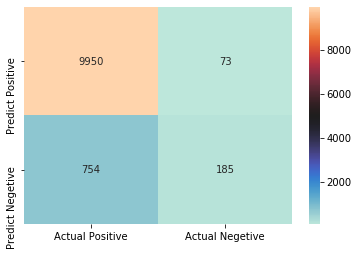

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10023
           1       0.72      0.20      0.31       939

    accuracy                           0.92     10962
   macro avg       0.82      0.59      0.63     10962
weighted avg       0.91      0.92      0.90     10962



# setting threshold

In [88]:
probs=Adaboost.predict_proba(x_test)
print(probs[:,1])

[0.48765632 0.49525897 0.48695752 ... 0.49615867 0.49524083 0.49680016]


In [89]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8683603324706741


Text(0.5, 0, 'FPR')

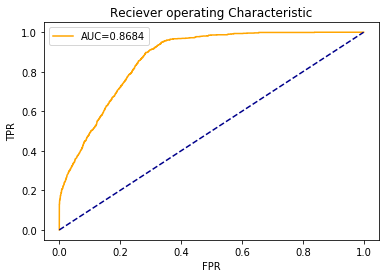

In [90]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

In [91]:
f1=[]
x=np.arange(0,1,0.01)
for i in range(0,100):
    preds=np.where(Adaboost.predict_proba(x_test)[:,1] >.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))

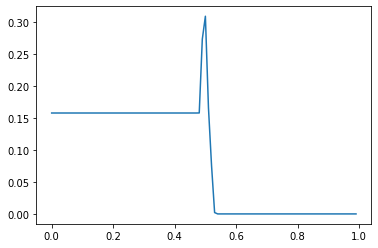

In [92]:
plt.plot(x,f1)
l=np.array(f1).max()
n=f1.index(l)

In [93]:
THRESHOLD=n*0.01
preds = np.where(Adaboost.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             9950               73
Predict Negetive              754              185


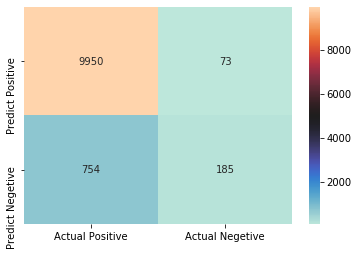

In [94]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [95]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10023
           1       0.72      0.20      0.31       939

    accuracy                           0.92     10962
   macro avg       0.82      0.59      0.63     10962
weighted avg       0.91      0.92      0.90     10962



# With feature selection

In [96]:
feature_imp=pd.Series(Adaboost.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

avg_training_score              0.28
department_Sales & Marketing    0.18
department_Operations           0.09
department_HR                   0.08
department_Finance              0.04
previous_year_rating            0.04
KPIs_met >80%                   0.04
department_Legal                0.03
age                             0.03
department_Procurement          0.02
length_of_service               0.02
department_R&D                  0.01
education                       0.01
region_region_23                0.01
region_region_2                 0.01
region_region_11                0.01
region_region_17                0.01
region_region_22                0.01
region_region_29                0.01
region_region_31                0.01
awards_won?                     0.01
region_region_34                0.01
region_region_4                 0.01
region_region_7                 0.01
region_region_9                 0.01
no_of_trainings                 0.01
region_region_14                0.00
d

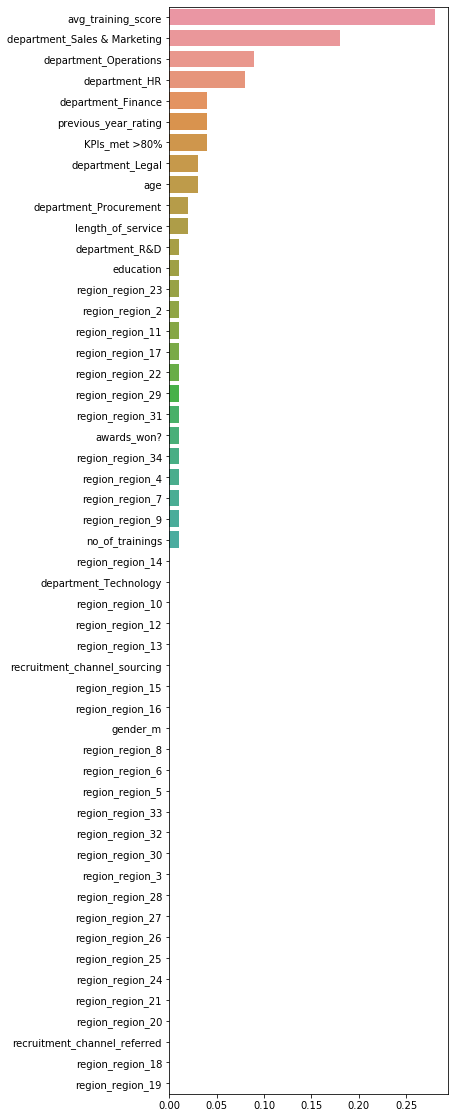

In [97]:
plt.figure(figsize=(5,20))
sns.barplot(feature_imp,feature_imp.index)

In [98]:
x_train.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_

In [99]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(Adaboost,threshold=0.02)

In [100]:
x_imp_train=feat_sel.fit_transform(x_train,y_train)
x_imp_test=feat_sel.transform(x_test)

In [101]:
Adaboost.fit(x_imp_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=12)

In [102]:
y_pred=Adaboost.predict(x_imp_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
predictions=metrics.f1_score(y_test,y_pred)
predictions

0.26631393298059963

                  Actual Positive  Actual Negetive
Predict Positive             9979               44
Predict Negetive              788              151


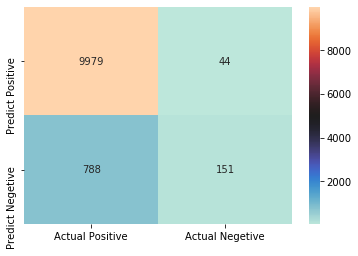

In [104]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10023
           1       0.77      0.16      0.27       939

    accuracy                           0.92     10962
   macro avg       0.85      0.58      0.61     10962
weighted avg       0.91      0.92      0.90     10962



# setting threshold

In [106]:
probs=Adaboost.predict_proba(x_imp_test)
print(probs[:,1])
probs

[0.4882751  0.49623281 0.48717081 ... 0.49203141 0.49558808 0.49617406]


array([[0.5117249 , 0.4882751 ],
       [0.50376719, 0.49623281],
       [0.51282919, 0.48717081],
       ...,
       [0.50796859, 0.49203141],
       [0.50441192, 0.49558808],
       [0.50382594, 0.49617406]])

In [107]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8604739981960554


Text(0.5, 0, 'FPR')

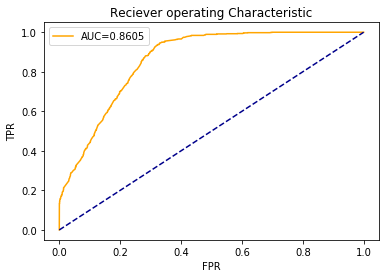

In [108]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

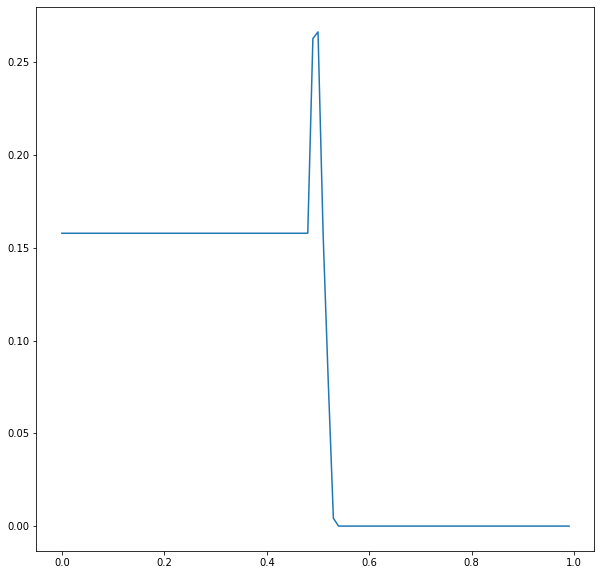

In [109]:
f1=[]
x=np.arange(start=0, stop=1, step=.01)
plt.figure(figsize=(10,10))
for i in range(0,100):
    preds=np.where(Adaboost.predict_proba(x_imp_test)[:,1] >.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [110]:
l=np.array(f1).max()

In [111]:
n=f1.index(l)
n

50

In [112]:
THRESHOLD=(n)*0.01
preds = np.where(Adaboost.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             9979               44
Predict Negetive              788              151


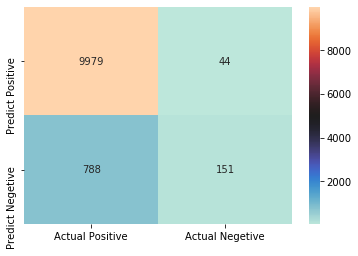

In [113]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [114]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10023
           1       0.77      0.16      0.27       939

    accuracy                           0.92     10962
   macro avg       0.85      0.58      0.61     10962
weighted avg       0.91      0.92      0.90     10962



# Balanced Dataset

# Without feature selection

In [115]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [116]:
model=DecisionTreeClassifier(criterion="gini",max_depth=1)
Adaboost=AdaBoostClassifier(base_estimator=model,n_estimators=100,learning_rate=1,random_state=12)
Adaboost.fit(x_train_res,y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=12)

In [117]:
y_pred=Adaboost.predict(x_test)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     10023
           1       0.21      0.87      0.33       939

    accuracy                           0.70     10962
   macro avg       0.59      0.78      0.57     10962
weighted avg       0.92      0.70      0.77     10962



                  Actual Positive  Actual Negetive
Predict Positive             6853             3170
Predict Negetive              119              820


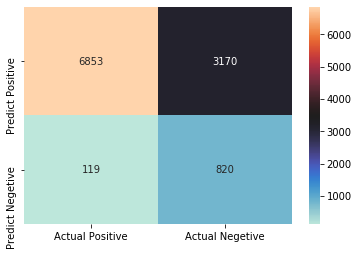

In [119]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# setting threshold

In [120]:
probs=Adaboost.predict_proba(x_test)
print(probs[:,1])

[0.49683545 0.50545699 0.49718799 ... 0.50102089 0.50196887 0.50309323]


In [121]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8557186947124914


Text(0.5, 0, 'FPR')

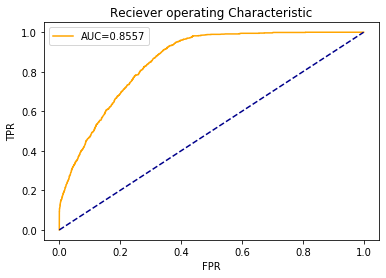

In [122]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

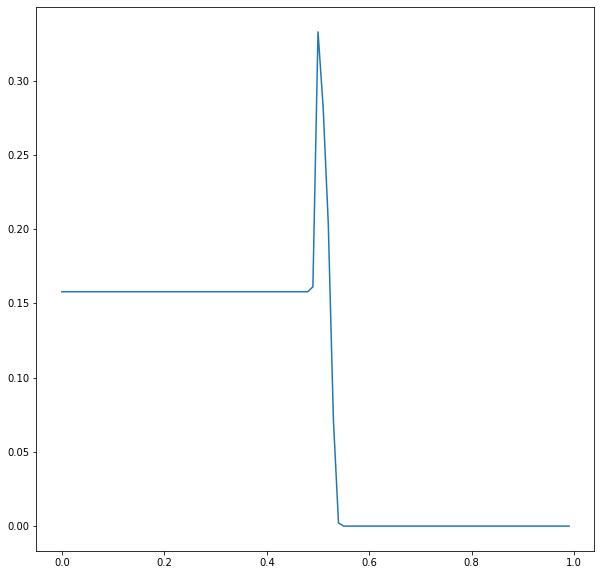

In [123]:
f1=[]
plt.figure(figsize=(10,10))
for i in range(0,100):
    preds=np.where(Adaboost.predict_proba(x_test)[:,1] >.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [124]:
l=np.array(f1).max()
n=f1.index(l)

In [125]:
THRESHOLD=n*0.01
preds = np.where(Adaboost.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

In [126]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     10023
           1       0.21      0.87      0.33       939

    accuracy                           0.70     10962
   macro avg       0.59      0.78      0.57     10962
weighted avg       0.92      0.70      0.77     10962



                  Actual Positive  Actual Negetive
Predict Positive             6853             3170
Predict Negetive              119              820


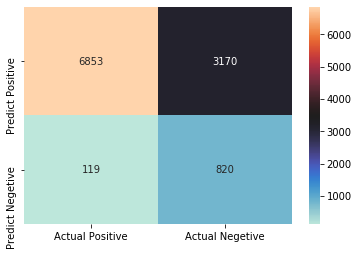

In [127]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# with feature selection

In [128]:
Adaboost.fit(x_train_res,y_train_res)
feature_imp=pd.Series(Adaboost.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

avg_training_score              0.27
department_Sales & Marketing    0.18
department_Operations           0.10
department_HR                   0.07
KPIs_met >80%                   0.04
department_Finance              0.04
age                             0.03
previous_year_rating            0.03
department_Legal                0.03
department_Procurement          0.02
education                       0.01
region_region_17                0.01
department_R&D                  0.01
region_region_20                0.01
region_region_22                0.01
region_region_23                0.01
awards_won?                     0.01
region_region_29                0.01
length_of_service               0.01
region_region_31                0.01
region_region_32                0.01
region_region_34                0.01
region_region_4                 0.01
region_region_5                 0.01
region_region_6                 0.01
region_region_7                 0.01
region_region_9                 0.01
n

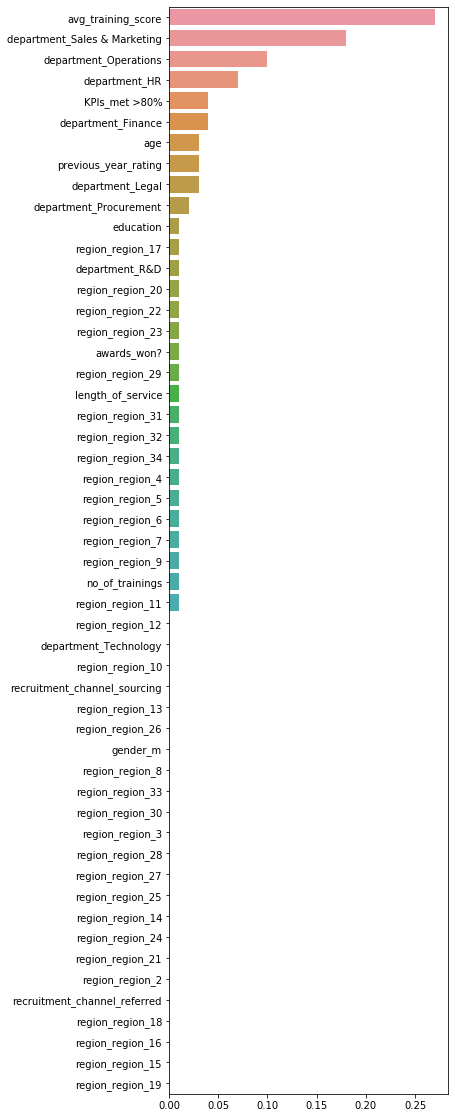

In [129]:
plt.figure(figsize=(5,20))
sns.barplot(feature_imp,feature_imp.index)

In [130]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(Adaboost,threshold=0.02)

In [131]:
x_imp_train=feat_sel.fit_transform(x_train_res,y_train_res)
x_imp_test=feat_sel.transform(x_test)

In [132]:
Adaboost.fit(x_imp_train,y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=12)

In [133]:
y_pred=Adaboost.predict(x_imp_test)
y_pred
predictions=metrics.f1_score(y_test,y_pred)
predictions

0.32089265101962294

                  Actual Positive  Actual Negetive
Predict Positive             6598             3425
Predict Negetive              105              834
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     10023
           1       0.20      0.89      0.32       939

    accuracy                           0.68     10962
   macro avg       0.59      0.77      0.55     10962
weighted avg       0.92      0.68      0.75     10962



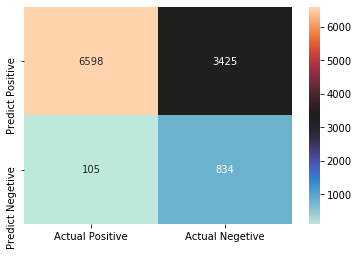

In [134]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")
print(classification_report(y_test,y_pred))

# setting threshold

In [135]:
probs=Adaboost.predict_proba(x_imp_test)
print(probs[:,1])

[0.49692704 0.50585932 0.4968611  ... 0.49791012 0.50247514 0.50218476]


In [136]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.847964059659588


Text(0.5, 0, 'FPR')

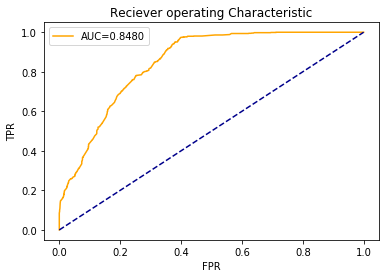

In [137]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

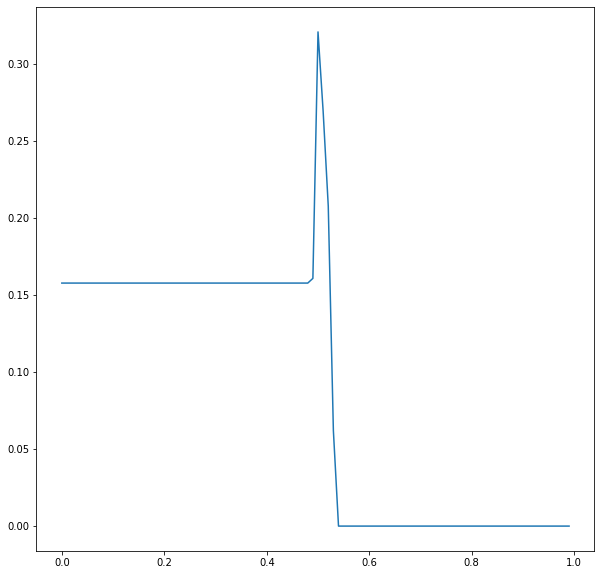

In [138]:
f1=[]
x=np.arange(start=0, stop=1, step=.01)
plt.figure(figsize=(10,10))
for i in range(0,100):
    preds=np.where(Adaboost.predict_proba(x_imp_test)[:,1] >.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [139]:
l=np.array(f1).max()
n=f1.index(l)

In [140]:
THRESHOLD=(n)*0.01
preds = np.where(Adaboost.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             6598             3425
Predict Negetive              105              834
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     10023
           1       0.20      0.89      0.32       939

    accuracy                           0.68     10962
   macro avg       0.59      0.77      0.55     10962
weighted avg       0.92      0.68      0.75     10962



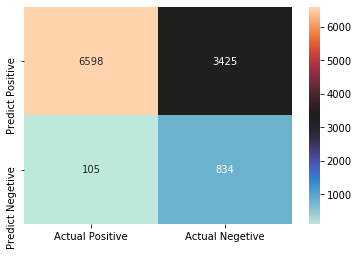

In [141]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")
print(classification_report(y_test,preds))

# Random Forest Classifier

# Imbalanced Dataset

# Without feature selection

In [142]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(criterion="gini",random_state=12,n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= "auto",
 max_depth= 80,
 bootstrap= False,n_jobs=-1)

In [143]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=10,
                       n_estimators=1000, n_jobs=-1, random_state=12)

In [144]:
y_pred=classifier.predict(x_test)

In [145]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

                  Actual Positive  Actual Negetive
Predict Positive             9994               29
Predict Negetive              652              287


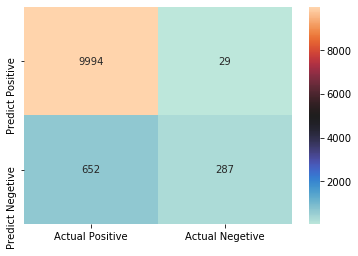

In [146]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10023
           1       0.91      0.31      0.46       939

    accuracy                           0.94     10962
   macro avg       0.92      0.65      0.71     10962
weighted avg       0.94      0.94      0.92     10962



In [148]:
accuracy_score(y_test,y_pred)

0.9378762999452654

In [149]:
metrics.f1_score(y_test,y_pred)

0.4573705179282869

# Setting Threshold

In [150]:
probs=classifier.predict_proba(x_test)
print(probs[:,1])

[0.00510595 0.20684643 0.01480476 ... 0.100225   0.02364921 0.08417103]


In [151]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8933041863139699


Text(0.5, 0, 'FPR')

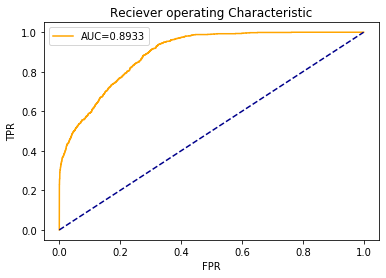

In [152]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

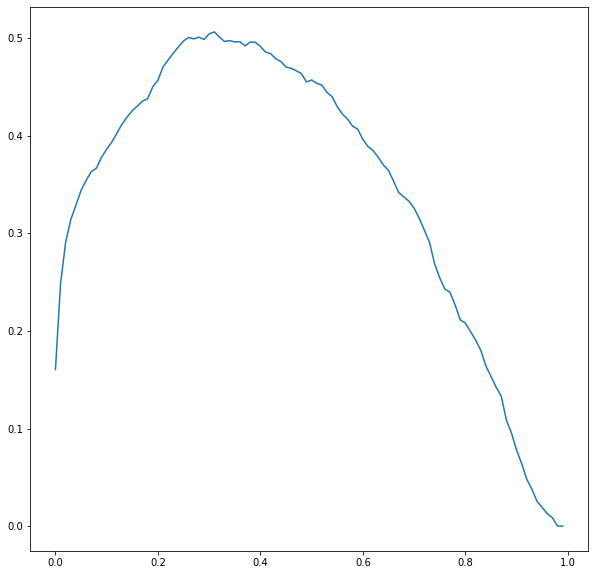

In [153]:
f1=[]
x=np.arange(start=0, stop=1, step=.01)
plt.figure(figsize=(10,10))
for i in range(0,100):
    preds=np.where(classifier.predict_proba(x_test)[:,1] >0.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [154]:
l=np.array(f1).max()
n=f1.index(l)

In [155]:
THRESHOLD=(n)*0.01
preds = np.where(classifier.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             9768              255
Predict Negetive              534              405


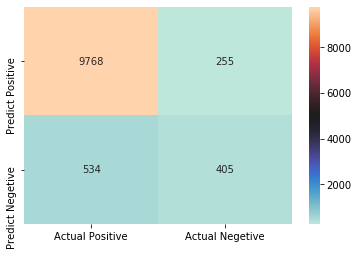

In [156]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [157]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10023
           1       0.61      0.43      0.51       939

    accuracy                           0.93     10962
   macro avg       0.78      0.70      0.73     10962
weighted avg       0.92      0.93      0.92     10962



In [158]:
metrics.f1_score(y_test,preds)

0.5065666041275797

# With feature selection

In [159]:
classifier.fit(x_train,y_train)
feature_imp=pd.Series(classifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

avg_training_score              0.369682
age                             0.081156
KPIs_met >80%                   0.075775
length_of_service               0.069176
previous_year_rating            0.057028
awards_won?                     0.050514
department_Sales & Marketing    0.039150
department_Operations           0.025647
no_of_trainings                 0.018723
gender_m                        0.014891
department_Procurement          0.014480
recruitment_channel_sourcing    0.014056
education                       0.012438
department_Technology           0.010943
department_Finance              0.008238
region_region_2                 0.007894
region_region_7                 0.006819
region_region_22                0.006705
region_region_13                0.006106
region_region_15                0.005973
recruitment_channel_referred    0.005690
region_region_23                0.005334
region_region_27                0.005332
region_region_4                 0.005284
region_region_26

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Feature Important Scores')

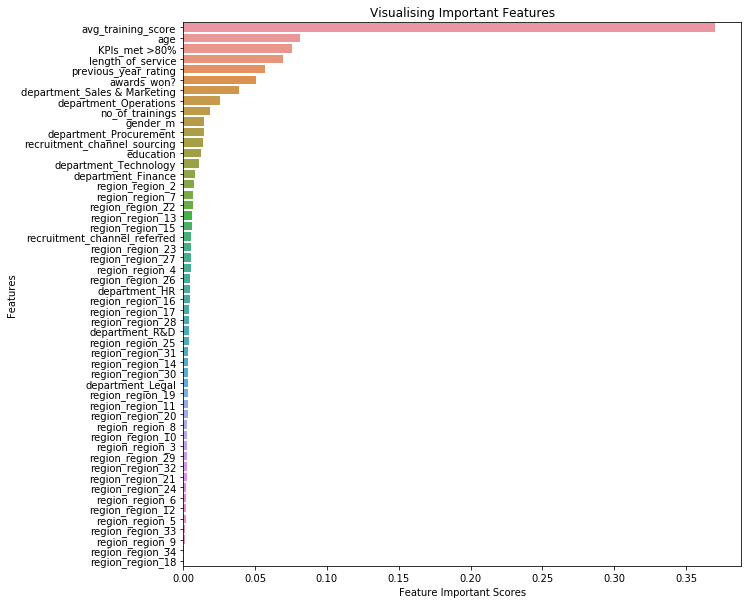

In [161]:
plt.figure(figsize=(10,10))
sns.barplot(feature_imp,feature_imp.index)
plt.title("Visualising Important Features")
plt.ylabel("Features")
plt.xlabel("Feature Important Scores")

In [162]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(classifier,threshold=0.001)

In [163]:
x_imp_train=feat_sel.fit_transform(x_train,y_train)
x_imp_test=feat_sel.transform(x_test)

In [164]:
clf_imp= RandomForestClassifier(criterion="gini",n_estimators=20,random_state=12)

In [165]:
clf_imp.fit(x_imp_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=12)

In [166]:
y_pred=clf_imp.predict(x_imp_test)

                  Actual Positive  Actual Negetive
Predict Positive             9956               67
Predict Negetive              675              264


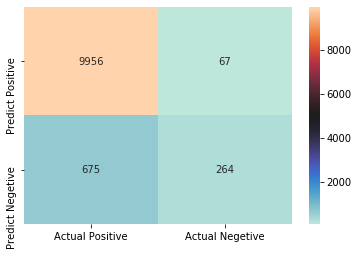

In [167]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10023
           1       0.80      0.28      0.42       939

    accuracy                           0.93     10962
   macro avg       0.87      0.64      0.69     10962
weighted avg       0.92      0.93      0.92     10962



In [169]:

accuracy_score(y_test,y_pred)

0.9323116219667944

# setting threshold

In [170]:
probs=clf_imp.predict_proba(x_imp_test)
print(probs[:,1])

[0.   0.05 0.   ... 0.25 0.05 0.  ]


In [171]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)


Area under the curve 0.8533260083278109


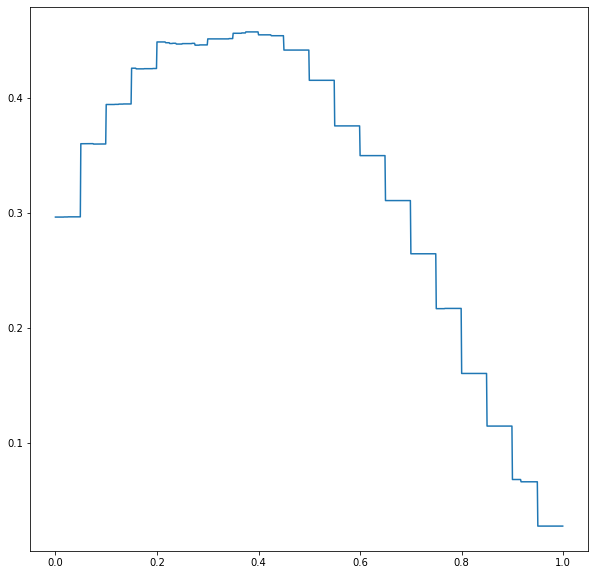

In [172]:
f1=[]
plt.figure(figsize=(10,10))
x=np.arange(0,1,0.001)
for i in range(0,1000):
    preds=np.where(clf_imp.predict_proba(x_imp_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [173]:
l=np.array(f1).max()
n=f1.index(l)

In [174]:
THRESHOLD=n*0.001
preds = np.where(clf_imp.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             9780              243
Predict Negetive              588              351


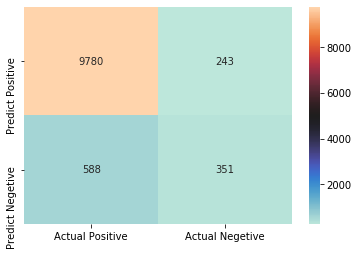

In [175]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [176]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10023
           1       0.59      0.37      0.46       939

    accuracy                           0.92     10962
   macro avg       0.77      0.67      0.71     10962
weighted avg       0.91      0.92      0.92     10962



In [177]:
metrics.f1_score(y_test,preds)

0.4579256360078278

# Balanced Dataset 

# without feature selection

In [178]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(criterion="gini",n_estimators=100,random_state=12)

In [179]:
classifier.fit(x_train_res,y_train_res)

RandomForestClassifier(random_state=12)

In [180]:
y_pred=classifier.predict(x_test)

                  Actual Positive  Actual Negetive
Predict Positive             9459              564
Predict Negetive              534              405


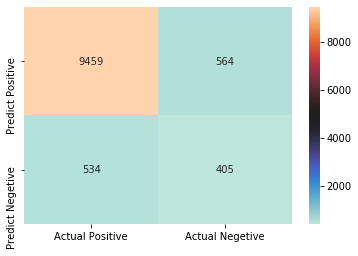

In [181]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10023
           1       0.42      0.43      0.42       939

    accuracy                           0.90     10962
   macro avg       0.68      0.69      0.68     10962
weighted avg       0.90      0.90      0.90     10962



In [183]:
accuracy_score(y_test,y_pred)

0.8998357963875205

In [184]:
metrics.f1_score(y_test,y_pred)

0.4245283018867924

# setting threshold

In [185]:
probs=classifier.predict_proba(x_test)
print(probs[:,1])
probs

[0.01 0.37 0.17 ... 0.11 0.03 0.68]


array([[0.99, 0.01],
       [0.63, 0.37],
       [0.83, 0.17],
       ...,
       [0.89, 0.11],
       [0.97, 0.03],
       [0.32, 0.68]])

In [186]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)


Area under the curve 0.8543587236045063


Text(0.5, 0, 'FPR')

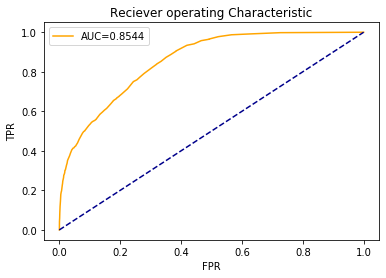

In [187]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

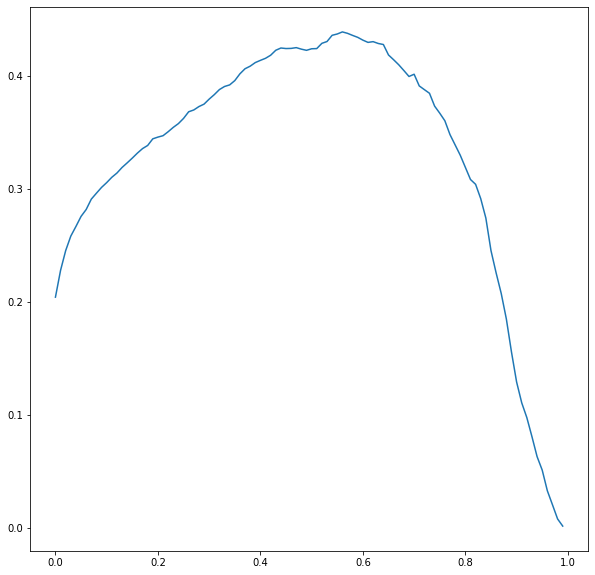

In [188]:
f1=[]
plt.figure(figsize=(10,10))
x=np.arange(0,1,0.01)
for i in range(0,100):
    preds=np.where(classifier.predict_proba(x_test)[:,1] >.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [189]:
l=np.array(f1).max()
n=f1.index(l)

In [190]:
THRESHOLD=n*0.01
preds = np.where(classifier.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             9609              414
Predict Negetive              558              381


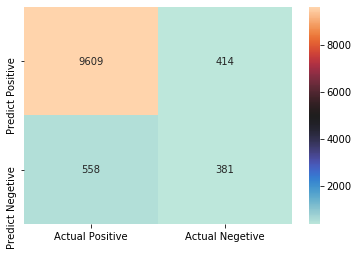

In [191]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [192]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10023
           1       0.48      0.41      0.44       939

    accuracy                           0.91     10962
   macro avg       0.71      0.68      0.70     10962
weighted avg       0.91      0.91      0.91     10962



In [193]:
metrics.f1_score(y_test,preds)

0.439446366782007

# with feature selection

In [194]:
feature_imp=pd.Series(classifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

avg_training_score              0.257026
KPIs_met >80%                   0.149293
age                             0.108431
length_of_service               0.085357
previous_year_rating            0.082875
awards_won?                     0.030806
department_Sales & Marketing    0.024228
recruitment_channel_sourcing    0.022363
no_of_trainings                 0.021598
gender_m                        0.018748
department_Operations           0.018146
education                       0.016922
department_Procurement          0.011723
region_region_2                 0.011071
department_Technology           0.008909
region_region_22                0.008758
region_region_7                 0.007445
department_Finance              0.007137
region_region_13                0.006400
region_region_15                0.006357
recruitment_channel_referred    0.005769
region_region_4                 0.005660
region_region_26                0.005377
region_region_27                0.005095
region_region_16

Text(0.5, 0, 'Feature Important Scores')

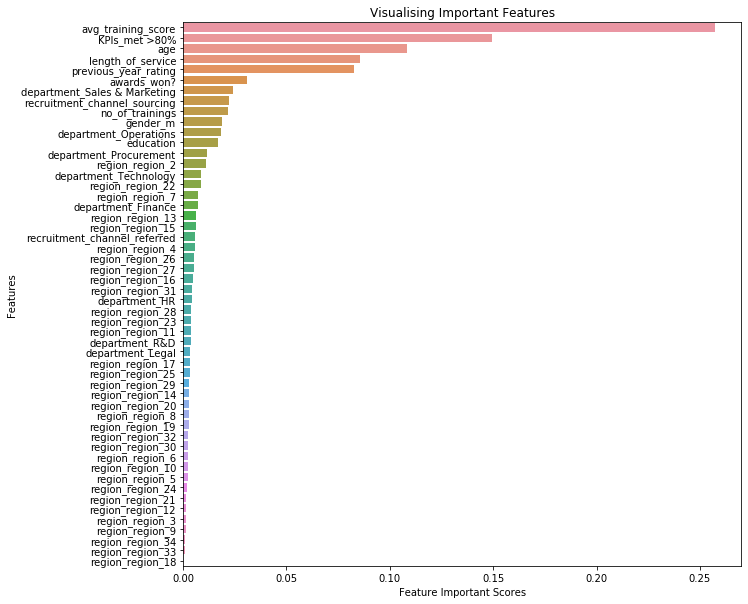

In [195]:
plt.figure(figsize=(10,10))
sns.barplot(feature_imp,feature_imp.index)
plt.title("Visualising Important Features")
plt.ylabel("Features")
plt.xlabel("Feature Important Scores")

In [196]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(classifier,threshold=0.003)

In [197]:
x_imp_train=feat_sel.fit_transform(x_train_res,y_train_res)
x_imp_test=feat_sel.transform(x_test)

In [198]:
clf_imp= RandomForestClassifier(criterion="gini",n_estimators=20,random_state=12)

In [199]:
clf_imp.fit(x_imp_train,y_train_res)

RandomForestClassifier(n_estimators=20, random_state=12)

In [200]:
y_pred=clf_imp.predict(x_imp_test)

                  Actual Positive  Actual Negetive
Predict Positive             9463              560
Predict Negetive              540              399


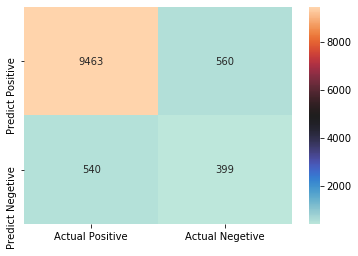

In [201]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10023
           1       0.42      0.42      0.42       939

    accuracy                           0.90     10962
   macro avg       0.68      0.68      0.68     10962
weighted avg       0.90      0.90      0.90     10962



# setting threshold

In [203]:
probs=clf_imp.predict_proba(x_imp_test)
print(probs[:,1])
probs

[0.   0.4  0.1  ... 0.15 0.05 0.7 ]


array([[1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.9 , 0.1 ],
       ...,
       [0.85, 0.15],
       [0.95, 0.05],
       [0.3 , 0.7 ]])

In [204]:
rob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)


Area under the curve 0.8543587236045063


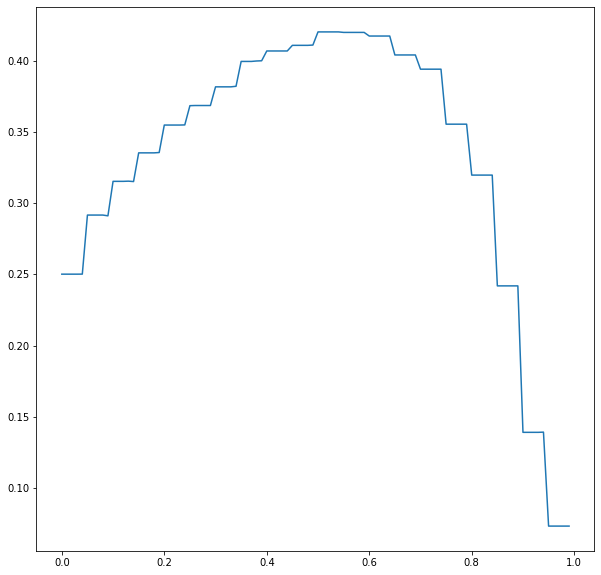

In [205]:
f1=[]
plt.figure(figsize=(10,10))
for i in range(0,100):
    preds=np.where(clf_imp.predict_proba(x_imp_test)[:,1] >.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [206]:
l=np.array(f1).max()
n=f1.index(l)
n

50

In [207]:
THRESHOLD=n*0.01
preds = np.where(clf_imp.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10023
           1       0.42      0.42      0.42       939

    accuracy                           0.90     10962
   macro avg       0.68      0.68      0.68     10962
weighted avg       0.90      0.90      0.90     10962

                  Actual Positive  Actual Negetive
Predict Positive             9463              560
Predict Negetive              540              399


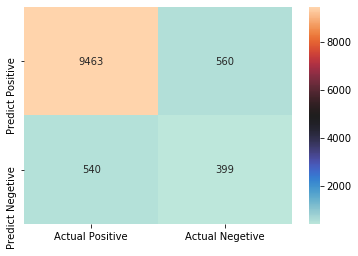

In [208]:
print(classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [209]:
metrics.f1_score(y_test,preds)

0.42044257112750266

#  Logistic Regression

# Imbalanced Dataset

# without feature selection

In [210]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000,n_jobs=-1)

In [211]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [212]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10023
           1       0.82      0.26      0.40       939

    accuracy                           0.93     10962
   macro avg       0.88      0.63      0.68     10962
weighted avg       0.93      0.93      0.92     10962

                  Actual Positive  Actual Negetive
Predict Positive             9969               54
Predict Negetive              693              246


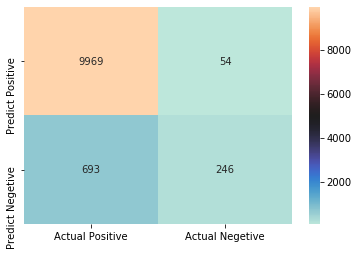

In [213]:
print(classification_report(y_test,pred))
cm=(metrics.confusion_matrix(y_test,pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [214]:
print(metrics.f1_score(y_test,pred))

0.3970944309927361


# setting threshold

In [215]:
probs=lr.predict_proba(x_test)
print(probs[:,1])
probs

[0.01055656 0.17278987 0.01038658 ... 0.2228152  0.15647013 0.19230078]


array([[0.98944344, 0.01055656],
       [0.82721013, 0.17278987],
       [0.98961342, 0.01038658],
       ...,
       [0.7771848 , 0.2228152 ],
       [0.84352987, 0.15647013],
       [0.80769922, 0.19230078]])

In [216]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.870724065214437


Text(0.5, 0, 'FPR')

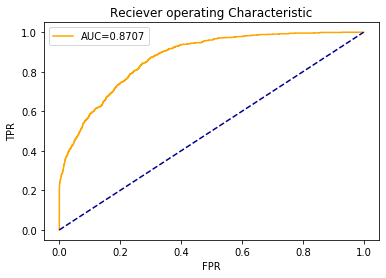

In [217]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

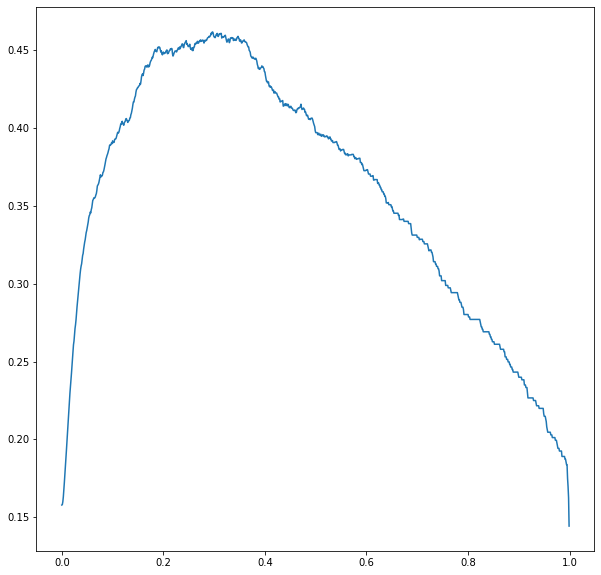

In [218]:
f1=[]
x=np.arange(start=0, stop=1, step=.001)
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(lr.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [219]:
l=np.array(f1).max()
n=f1.index(l)
n

297

In [220]:
THRESHOLD=n*0.001
preds = np.where(lr.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10023
           1       0.54      0.41      0.46       939

    accuracy                           0.92     10962
   macro avg       0.74      0.69      0.71     10962
weighted avg       0.91      0.92      0.91     10962

                  Actual Positive  Actual Negetive
Predict Positive             9693              330
Predict Negetive              558              381


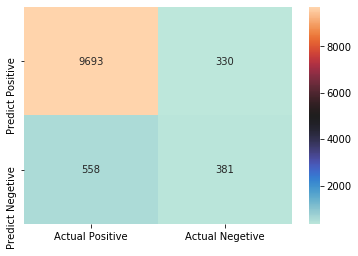

In [221]:
print(classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [222]:
print(accuracy_score(y_test,preds))

0.9189928845101258


# with feature selection 

In [223]:
lr.fit(x_train[columns],y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [224]:
columns

Index(['avg_training_score', 'awards_won?', 'KPIs_met >80%',
       'previous_year_rating'],
      dtype='object')

In [225]:
y_pred=lr.predict(x_test[columns])

                  Actual Positive  Actual Negetive
Predict Positive             9986               37
Predict Negetive              881               58


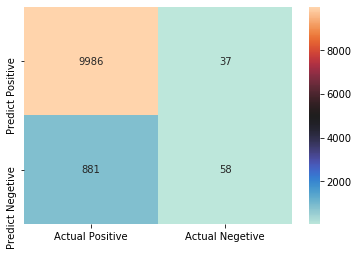

In [226]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10023
           1       0.61      0.06      0.11       939

    accuracy                           0.92     10962
   macro avg       0.76      0.53      0.53     10962
weighted avg       0.89      0.92      0.88     10962



# setting threshold

In [228]:
probs=lr.predict_proba(x_test[columns])
print(probs[:,1])

[0.02649166 0.06866758 0.04057578 ... 0.37409945 0.12064823 0.04153604]


In [229]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.800601003209126


Text(0.5, 0, 'FPR')

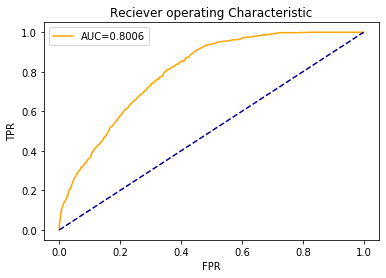

In [230]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

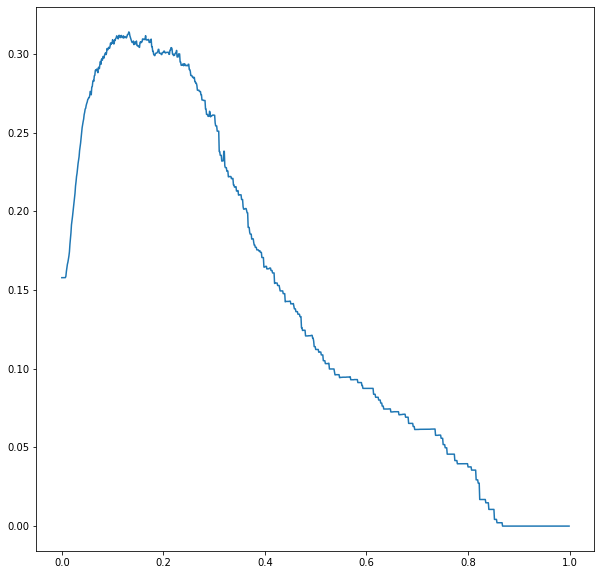

In [231]:
f1=[]
x=np.arange(start=0, stop=1, step=.001)
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(lr.predict_proba(x_test[columns])[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [232]:
l=np.array(f1).max()
n=f1.index(l)

In [233]:
THRESHOLD=0.001*n
preds = np.where(lr.predict_proba(x_test[columns])[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10023
           1       0.22      0.52      0.31       939

    accuracy                           0.81     10962
   macro avg       0.59      0.68      0.60     10962
weighted avg       0.89      0.81      0.84     10962

                  Actual Positive  Actual Negetive
Predict Positive             8341             1682
Predict Negetive              451              488


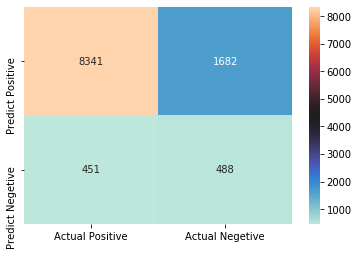

In [234]:
print(classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# Balanced Dataset

# without feature selection

In [235]:
lr=LogisticRegression(max_iter=10000, n_jobs=-1)

In [236]:
lr.fit(x_train_res,y_train_res)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [237]:
y_pred=lr.predict(x_test)

                  Actual Positive  Actual Negetive
Predict Positive             5561             4462
Predict Negetive               24              915


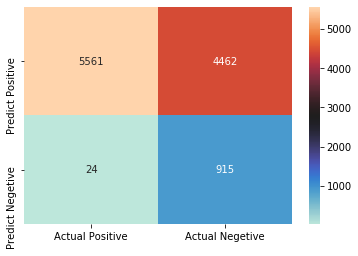

In [238]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [239]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     10023
           1       0.17      0.97      0.29       939

    accuracy                           0.59     10962
   macro avg       0.58      0.76      0.50     10962
weighted avg       0.92      0.59      0.68     10962



In [240]:
metrics.f1_score(y_test,y_pred)

0.2897403419886003

# setting threshold

In [241]:
probs=lr.predict_proba(x_test)
print(probs[:,1])
probs

[0.21406007 0.88612161 0.38717021 ... 0.95336997 0.91932292 0.80584695]


array([[0.78593993, 0.21406007],
       [0.11387839, 0.88612161],
       [0.61282979, 0.38717021],
       ...,
       [0.04663003, 0.95336997],
       [0.08067708, 0.91932292],
       [0.19415305, 0.80584695]])

In [242]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)
tpr

Area under the curve 0.8700735911238018


array([0.        , 0.00106496, 0.13951012, ..., 0.99893504, 1.        ,
       1.        ])

Text(0.5, 0, 'FPR')

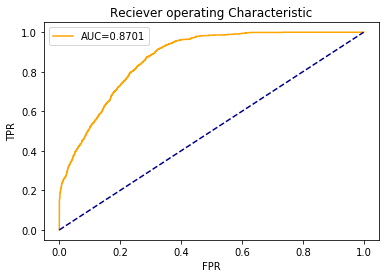

In [243]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

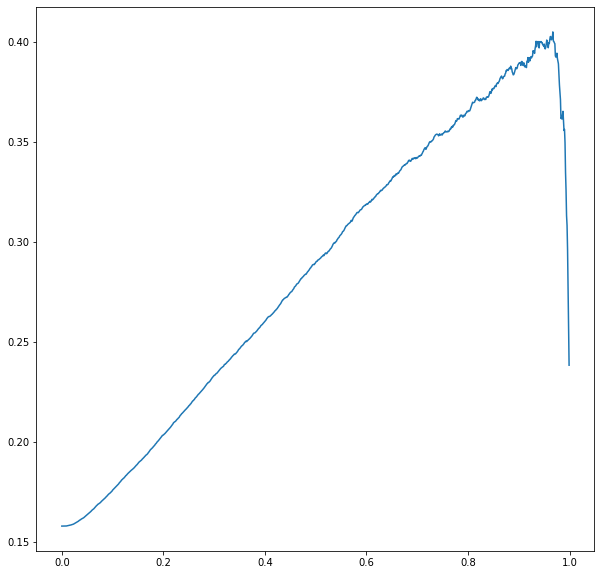

In [244]:
f1=[]
x=np.arange(start=0, stop=1, step=.001)
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(lr.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [245]:
l=np.array(f1).max()
n=f1.index(l)

In [246]:
THRESHOLD=n*0.001
preds = np.where(lr.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             9497              526
Predict Negetive              567              372


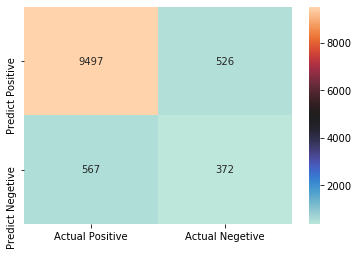

In [247]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [248]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10023
           1       0.41      0.40      0.41       939

    accuracy                           0.90     10962
   macro avg       0.68      0.67      0.68     10962
weighted avg       0.90      0.90      0.90     10962



# With feature selection

In [249]:
lr.fit(x_train_res[columns_res],y_train_res)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [250]:
y_pred=lr.predict(x_test[columns_res])

In [251]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5749 4274]
 [  98  841]]
              precision    recall  f1-score   support

           0       0.98      0.57      0.72     10023
           1       0.16      0.90      0.28       939

    accuracy                           0.60     10962
   macro avg       0.57      0.73      0.50     10962
weighted avg       0.91      0.60      0.69     10962



# setting threshold

In [252]:
probs=lr.predict_proba(x_test[columns_res])
print(probs[:,1])

[0.28524309 0.61305755 0.41573945 ... 0.98261986 0.75928249 0.3907929 ]


In [253]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8017051728840493


Text(0.5, 0, 'FPR')

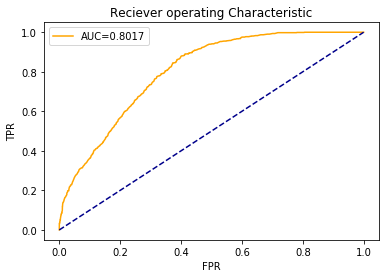

In [254]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

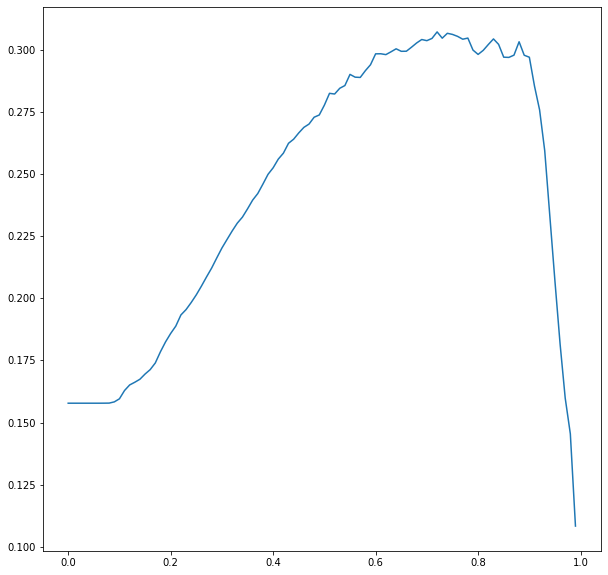

In [255]:
f1=[]
x=np.arange(start=0, stop=1, step=.01)
plt.figure(figsize=(10,10))
for i in range(0,100):
    preds=np.where(lr.predict_proba(x_test[columns_res])[:,1] >.01*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [256]:
l=np.array(f1).max()
n=f1.index(l)
n

72

In [257]:
THRESHOLD=n*0.01
preds = np.where(lr.predict_proba(x_test[columns])[:,1] > THRESHOLD, 1, 0)

                  Actual Positive  Actual Negetive
Predict Positive             8396             1627
Predict Negetive              460              479


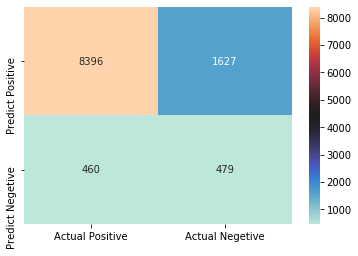

In [258]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [259]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10023
           1       0.23      0.51      0.31       939

    accuracy                           0.81     10962
   macro avg       0.59      0.67      0.60     10962
weighted avg       0.89      0.81      0.84     10962



# Gradient Boosting

# Imbalanced dataset

# without feature selection

In [260]:
from sklearn.ensemble import GradientBoostingClassifier

In [261]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [262]:
y_pred=clf.predict(x_test)

In [263]:
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
metrics.accuracy_score(y_test,y_pred)

0.9384236453201971

In [264]:
metrics.f1_score(y_test,y_pred)

0.44717444717444715

In [265]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10023
           1       0.97      0.29      0.45       939

    accuracy                           0.94     10962
   macro avg       0.95      0.64      0.71     10962
weighted avg       0.94      0.94      0.92     10962



                  Actual Positive  Actual Negetive
Predict Positive            10014                9
Predict Negetive              666              273


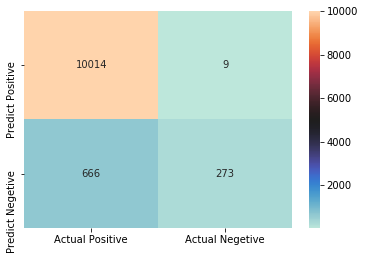

In [266]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# setting threshold

In [267]:
probs=clf.predict_proba(x_test)
print(probs[:,1])

[0.0089888  0.12522553 0.0164387  ... 0.13376229 0.09620879 0.06348618]


In [268]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9047588841723673


Text(0.5, 0, 'FPR')

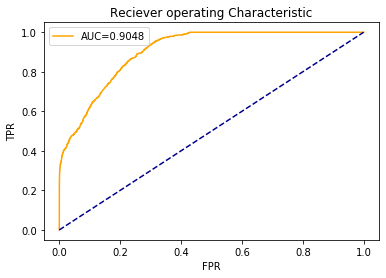

In [269]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

In [270]:
f1=[]

for i in range(0,1000):
    preds=np.where(clf.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))

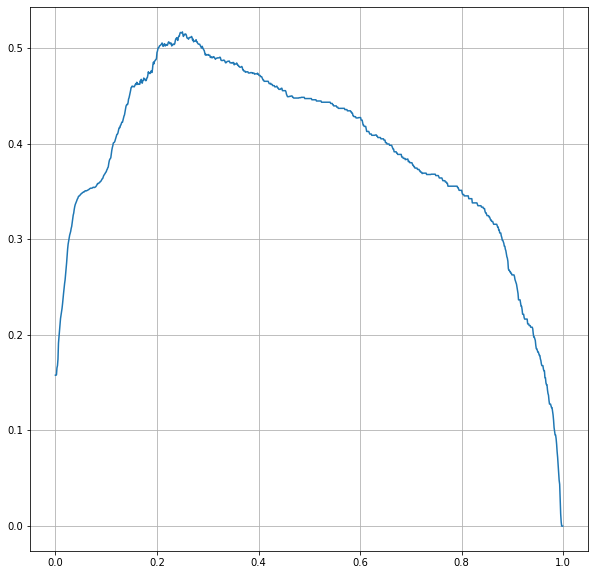

In [271]:
plt.figure(figsize=(10,10))
plt.grid()
x=np.arange(0,1,0.001)
plt.plot(x,f1)

In [272]:
l=np.array(f1).max()
n=f1.index(l)

In [273]:
THRESHOLD=n*0.001
preds = np.where(clf.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10023
           1       0.73      0.40      0.52       939

    accuracy                           0.94     10962
   macro avg       0.84      0.69      0.74     10962
weighted avg       0.93      0.94      0.93     10962

                  Actual Positive  Actual Negetive
Predict Positive             9886              137
Predict Negetive              564              375


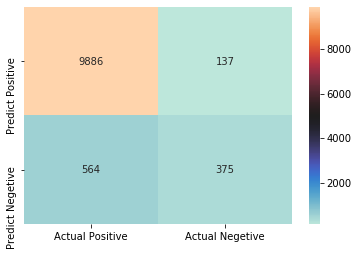

In [274]:
print(classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [275]:
metrics.f1_score(y_test,preds)

0.5168849069607168

# with feature selection

In [276]:
clf=GradientBoostingClassifier(random_state=0)
clf.fit(x_train,y_train)
feature_imp=pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

avg_training_score              0.420903
KPIs_met >80%                   0.133174
department_Operations           0.113932
department_Sales & Marketing    0.106558
awards_won?                     0.065590
department_Procurement          0.044518
previous_year_rating            0.036889
department_Finance              0.025345
department_Technology           0.020660
length_of_service               0.006917
age                             0.004620
department_R&D                  0.004142
department_HR                   0.003451
gender_m                        0.003111
region_region_7                 0.001459
region_region_4                 0.001356
region_region_22                0.001233
recruitment_channel_referred    0.001137
education                       0.000633
no_of_trainings                 0.000585
region_region_9                 0.000575
region_region_17                0.000544
region_region_25                0.000531
region_region_23                0.000523
region_region_29

Text(0.5, 0, 'Feature Important Scores')

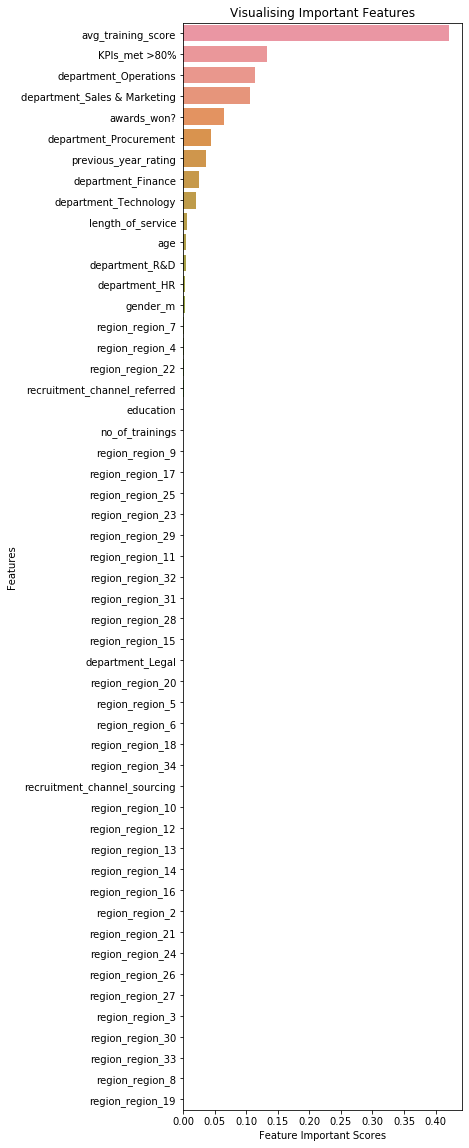

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,20))
sns.barplot(feature_imp,feature_imp.index)
plt.title("Visualising Important Features")
plt.ylabel("Features")
plt.xlabel("Feature Important Scores")

In [278]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(clf,threshold=0.01)

In [279]:
x_imp_train=feat_sel.fit_transform(x_train,y_train)
x_imp_test=feat_sel.transform(x_test)

In [280]:
clf_imp=GradientBoostingClassifier(random_state=0,n_estimators= 250, max_depth= 3, learning_rate= 0.1)
pd.DataFrame(x_imp_train)

,0,1,2,3,4,5,6,7,8
0,-0.254398,-0.737404,-0.153863,-1.147918,-0.220559,-0.511869,-0.386284,1.499364,-0.387141
1,-0.254398,-0.737404,-0.153863,1.619733,-0.220559,-0.511869,-0.386284,-0.666949,2.583039
2,-0.254398,-0.737404,-0.153863,1.096124,-0.220559,-0.511869,-0.386284,-0.666949,2.583039
3,-0.254398,-0.737404,-0.153863,-0.549507,-0.220559,1.953626,-0.386284,-0.666949,-0.387141
4,-1.903957,-0.737404,-0.153863,-1.297521,-0.220559,-0.511869,-0.386284,1.499364,-0.387141
...,...,...,...,...,...,...,...,...,...
43841,-1.903957,-0.737404,-0.153863,-0.923514,-0.220559,-0.511869,-0.386284,1.499364,-0.387141
43842,-0.254398,-0.737404,-0.153863,-0.399904,4.533932,-0.511869,-0.386284,-0.666949,-0.387141
43843,-0.254398,1.356109,-0.153863,-1.147918,-0.220559,-0.511869,-0.386284,1.499364,-0.387141
43844,-0.254398,-0.737404,-0.153863,-0.998315,-0.220559,-0.511869,-0.386284,1.499364,-0.387141


In [281]:
clf_imp.fit(x_imp_train,y_train)

GradientBoostingClassifier(n_estimators=250, random_state=0)

In [282]:
y_pred=clf_imp.predict(x_imp_test)

                  Actual Positive  Actual Negetive
Predict Positive            10002               21
Predict Negetive              620              319


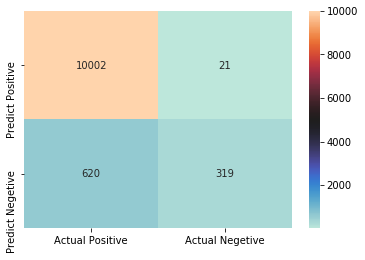

In [283]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [284]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10023
           1       0.94      0.34      0.50       939

    accuracy                           0.94     10962
   macro avg       0.94      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



In [285]:
metrics.f1_score(y_test,y_pred)

0.4988272087568413

# setting threshold

In [286]:
probs=clf_imp.predict_proba(x_imp_test)
print(probs[:,1])

[0.00340471 0.20181255 0.00910916 ... 0.23895563 0.09028655 0.15094716]


In [287]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8979306593769368


Text(0.5, 0, 'FPR')

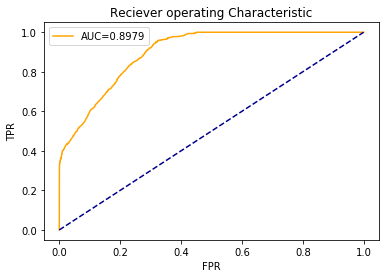

In [288]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

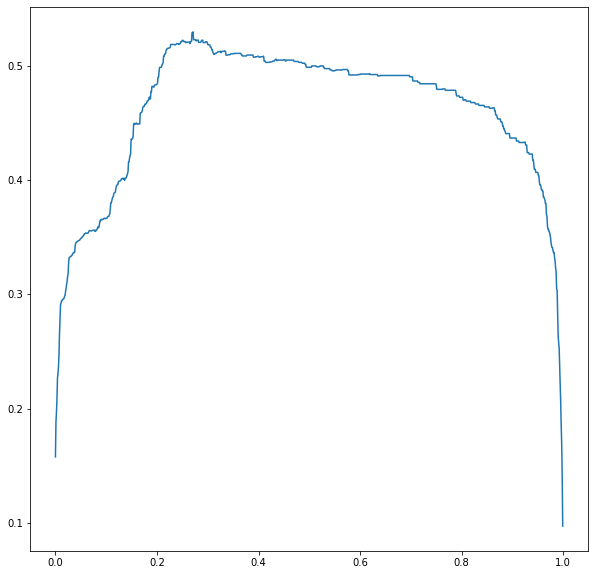

In [289]:
f1=[]
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(clf_imp.predict_proba(x_imp_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [290]:
l=np.array(f1).max()

In [291]:
n=f1.index(l)

In [292]:
THRESHOLD=n*0.001

preds = np.where(clf_imp.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10023
           1       0.79      0.40      0.53       939

    accuracy                           0.94     10962
   macro avg       0.87      0.69      0.75     10962
weighted avg       0.93      0.94      0.93     10962

                  Actual Positive  Actual Negetive
Predict Positive             9924               99
Predict Negetive              565              374


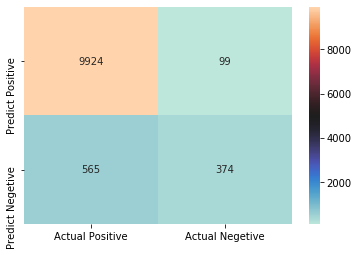

In [293]:
 print(classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [294]:
metrics.f1_score(y_test,preds)

0.5297450424929178

# Balanced Dataset

# without feature selection

In [295]:
 clf.fit(x_train_res, y_train_res)
y_pred=clf.predict(x_test)

In [296]:
accuracy_score(y_test,y_pred)

0.6563583287721219

In [297]:
metrics.f1_score(y_test,y_pred)

0.3252731506358588

In [298]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     10023
           1       0.20      0.97      0.33       939

    accuracy                           0.66     10962
   macro avg       0.60      0.80      0.55     10962
weighted avg       0.93      0.66      0.73     10962



                  Actual Positive  Actual Negetive
Predict Positive             6287             3736
Predict Negetive               31              908


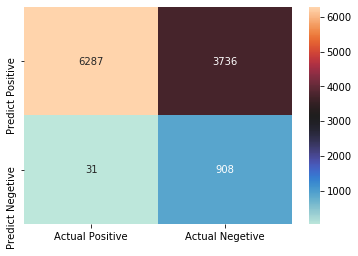

In [299]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# setting threshold

In [300]:
probs=clf.predict_proba(x_test)
print(probs[:,1])

[0.10907239 0.88533918 0.51394188 ... 0.62315425 0.54768135 0.82784643]


In [301]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8810519617446433


Text(0.5, 0, 'FPR')

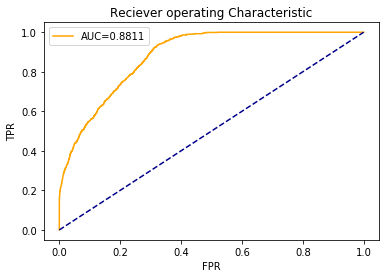

In [302]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

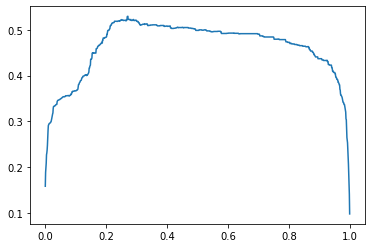

In [303]:
l=np.array(f1).max()
n=f1.index(l)
plt.plot(x,f1)

In [304]:
THRESHOLD=n*0.001

preds = np.where(clf.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67     10023
           1       0.16      1.00      0.27       939

    accuracy                           0.54     10962
   macro avg       0.58      0.75      0.47     10962
weighted avg       0.93      0.54      0.63     10962

                  Actual Positive  Actual Negetive
Predict Positive             5027             4996
Predict Negetive                1              938


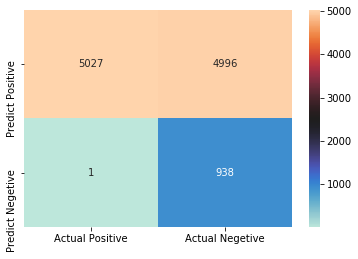

In [305]:
print(classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# with feature selection

In [306]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(x_train_res, y_train_res)
feature_imp=pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

KPIs_met >80%                   0.317456
avg_training_score              0.298317
previous_year_rating            0.101088
department_Sales & Marketing    0.099220
awards_won?                     0.047137
department_Operations           0.046614
department_Procurement          0.026126
department_Technology           0.015338
department_Finance              0.009902
department_HR                   0.008125
length_of_service               0.006828
age                             0.005742
department_R&D                  0.002737
recruitment_channel_referred    0.002006
region_region_7                 0.001726
region_region_29                0.001322
region_region_22                0.001321
region_region_4                 0.001200
education                       0.001005
no_of_trainings                 0.000659
region_region_5                 0.000522
region_region_8                 0.000518
gender_m                        0.000506
region_region_32                0.000487
region_region_26

Text(0.5, 0, 'Feature Important Scores')

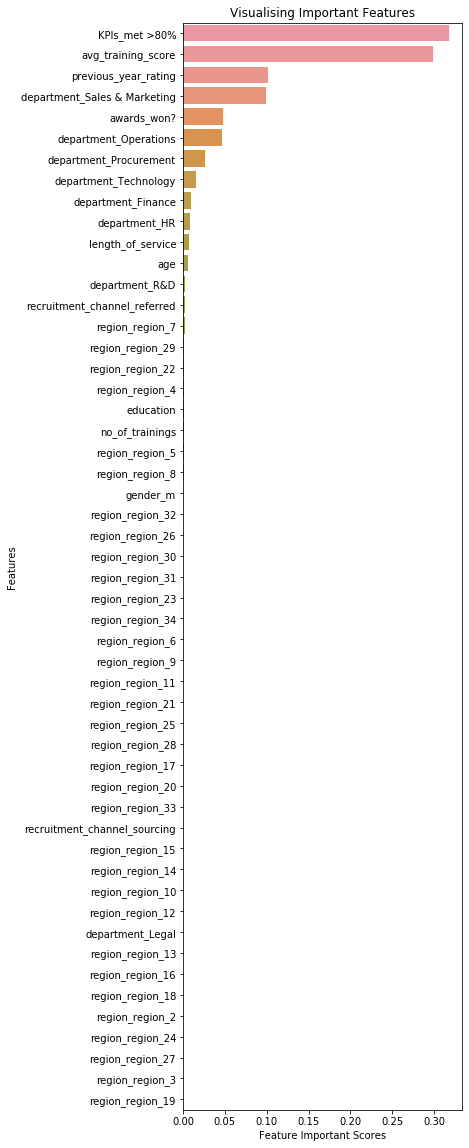

In [307]:
plt.figure(figsize=(5,20))
sns.barplot(feature_imp,feature_imp.index)
plt.title("Visualising Important Features")
plt.ylabel("Features")
plt.xlabel("Feature Important Scores")

In [308]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(clf,threshold=0.001)

In [309]:
x_imp_train=feat_sel.fit_transform(x_train_res,y_train_res)
x_imp_test=feat_sel.transform(x_test)

In [310]:
clf.fit(x_imp_train,y_train_res)

GradientBoostingClassifier(random_state=0)

                  Actual Positive  Actual Negetive
Predict Positive             6389             3634
Predict Negetive               38              901
              precision    recall  f1-score   support

           0       0.99      0.64      0.78     10023
           1       0.20      0.96      0.33       939

    accuracy                           0.67     10962
   macro avg       0.60      0.80      0.55     10962
weighted avg       0.93      0.67      0.74     10962



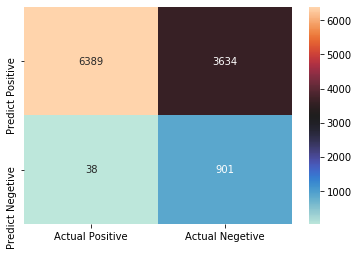

In [311]:
y_pred=clf.predict(x_imp_test)
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")
print(classification_report(y_test,y_pred))

# setting threshold

In [312]:
probs=clf.predict_proba(x_imp_test)
print(probs[:,1])

[0.09845036 0.90355264 0.47374009 ... 0.65185913 0.52110119 0.79591975]


In [313]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8820078037765535


Text(0.5, 0, 'FPR')

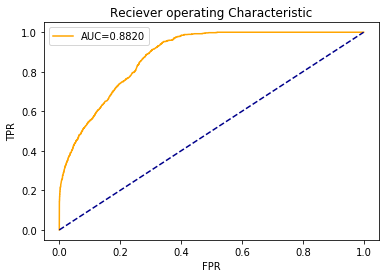

In [314]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

In [315]:
f1=[]
for i in range(0,1000):
    preds=np.where(clf.predict_proba(x_imp_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))

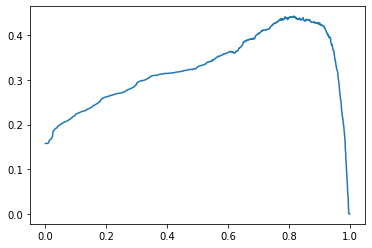

In [316]:
l=np.array(f1).max()
n=f1.index(l)
plt.plot(x,f1)

In [317]:
THRESHOLD=n*0.001
preds = np.where(clf.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10023
           1       0.45      0.43      0.44       939

    accuracy                           0.91     10962
   macro avg       0.70      0.69      0.70     10962
weighted avg       0.90      0.91      0.91     10962

                  Actual Positive  Actual Negetive
Predict Positive             9530              493
Predict Negetive              532              407


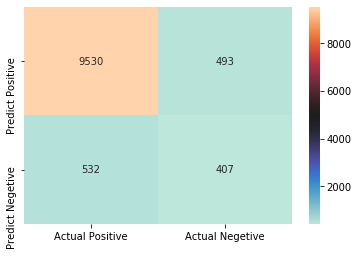

In [318]:
print(classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# Naive Bayes

# Imbalanced Dataset

# Without feature selection

In [319]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [320]:
y_pred=gnb.predict(x_test)

In [321]:
from sklearn import metrics
print('F1 score: {0:0.3f}'.format(metrics.f1_score(y_test,y_pred)))

F1 score: 0.230


In [322]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,5571,4452
Predict Negetive,240,699


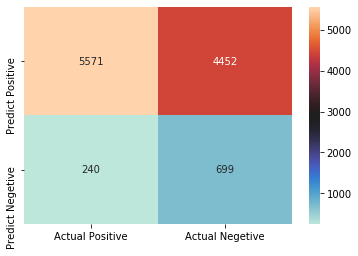

In [323]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [324]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.56      0.70     10023
           1       0.14      0.74      0.23       939

    accuracy                           0.57     10962
   macro avg       0.55      0.65      0.47     10962
weighted avg       0.89      0.57      0.66     10962



# setting threshold

In [325]:
probs=gnb.predict_proba(x_test)
print(probs[:,1])

[0.02445431 0.03800073 0.01338022 ... 1.         0.86482027 0.83638759]


In [326]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.6909822530650218


Text(0.5, 0, 'FPR')

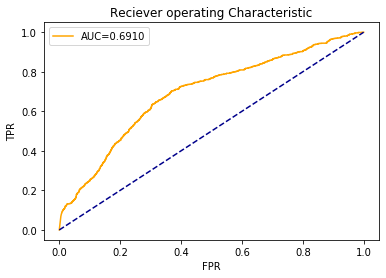

In [327]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

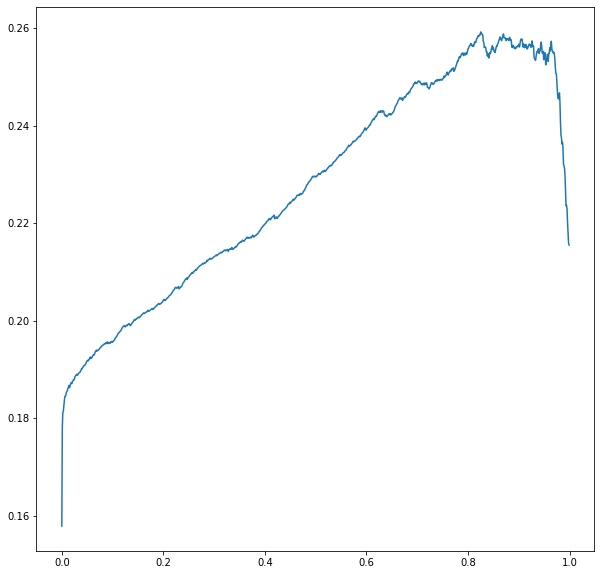

In [328]:
f1=[]
x=np.arange(start=0, stop=1, step=.001)
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(gnb.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [329]:
l=np.array(f1).max()
n=f1.index(l)
n

825

In [330]:
THRESHOLD=(n)*0.001
preds = np.where(gnb.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

In [331]:
print(metrics.classification_report(y_test,preds))
print(metrics.confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     10023
           1       0.16      0.63      0.26       939

    accuracy                           0.69     10962
   macro avg       0.56      0.66      0.53     10962
weighted avg       0.89      0.69      0.76     10962

[[6959 3064]
 [ 343  596]]


In [332]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,6959,3064
Predict Negetive,343,596


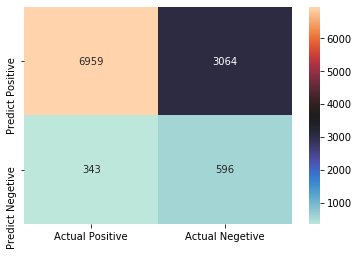

In [333]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# With feature selection

In [334]:
gnb.fit(x_train[columns],y_train)

GaussianNB()

In [335]:
y_pred=gnb.predict(x_test[columns])

In [336]:
metrics.f1_score(y_test,y_pred)

0.18410041841004182

In [337]:
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10023
           1       0.43      0.12      0.18       939

    accuracy                           0.91     10962
   macro avg       0.68      0.55      0.57     10962
weighted avg       0.88      0.91      0.89     10962



In [338]:
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,6959,3064
Predict Negetive,343,596


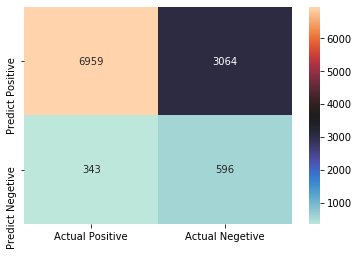

In [339]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# Setting threshold

In [340]:
probs=gnb.predict_proba(x_test[columns])
print(probs[:,1])

[0.00696344 0.03248153 0.00447273 ... 1.         0.06763502 0.01422599]


In [341]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.7984274082283803


Text(0.5, 0, 'FPR')

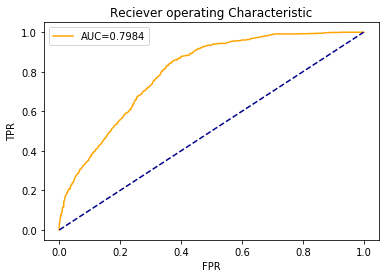

In [342]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

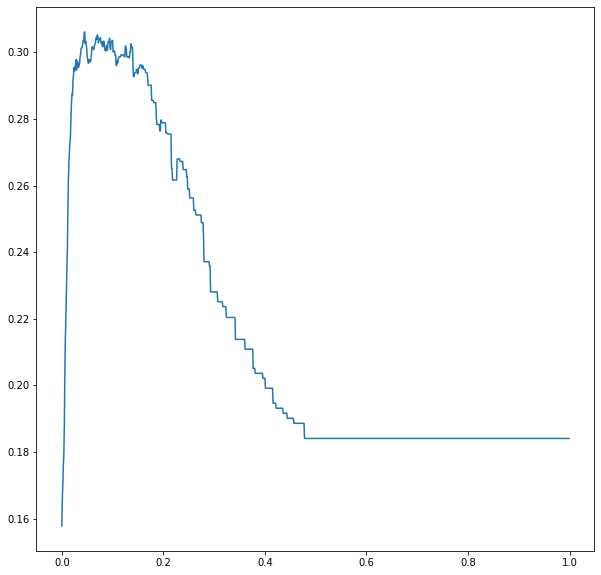

In [343]:
f1=[]
x=np.arange(start=0, stop=1, step=.001)
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(gnb.predict_proba(x_test[columns])[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [344]:
l=np.array(f1).max()
n=f1.index(l)

In [345]:
THRESHOLD=(n)*0.001
preds = np.where(gnb.predict_proba(x_test[columns])[:,1] > THRESHOLD, 1, 0)

In [346]:
print(metrics.classification_report(y_test,preds))
print(metrics.confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     10023
           1       0.20      0.67      0.31       939

    accuracy                           0.74     10962
   macro avg       0.58      0.71      0.57     10962
weighted avg       0.90      0.74      0.79     10962

[[7459 2564]
 [ 306  633]]


In [347]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,7459,2564
Predict Negetive,306,633


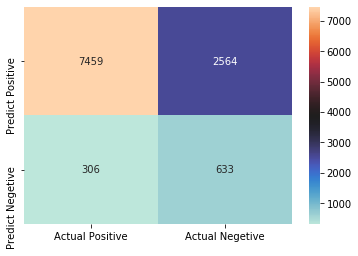

In [348]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# Balanced Dataset

# Without feature selection

In [349]:
gnb.fit(x_train_res,y_train_res)

GaussianNB()

In [350]:
y_pred=gnb.predict(x_test)

In [351]:
print('F1 score: {0:0.3f}'.format(metrics.f1_score(y_test,y_pred)))

F1 score: 0.191


In [352]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,3473,6550
Predict Negetive,147,792


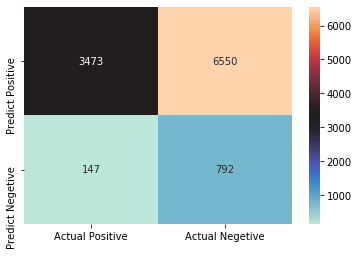

In [353]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [354]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.35      0.51     10023
           1       0.11      0.84      0.19       939

    accuracy                           0.39     10962
   macro avg       0.53      0.59      0.35     10962
weighted avg       0.89      0.39      0.48     10962



# setting threshold

In [355]:
probs=gnb.predict_proba(x_test)
print(probs[:,1])

[0.0069877  0.59249685 0.00596557 ... 1.         0.99248497 0.99012502]


In [356]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.6949248889428649


Text(0.5, 0, 'FPR')

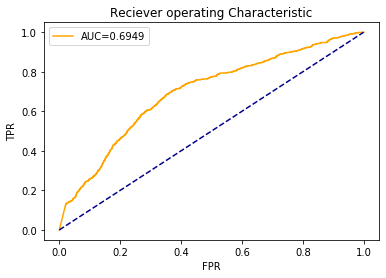

In [357]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

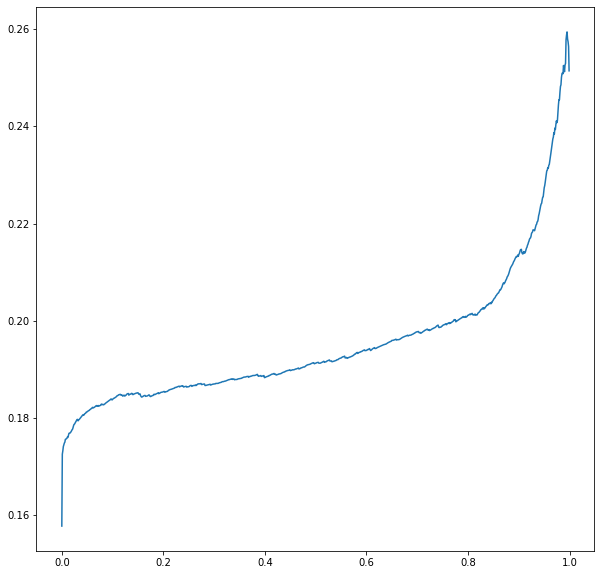

In [358]:
f1=[]
x=np.arange(start=0, stop=1, step=.001)
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(gnb.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [359]:
l=np.array(f1).max()
n=f1.index(l)

In [360]:
THRESHOLD=(n)*0.001
preds = np.where(gnb.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

In [361]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,7372,2651
Predict Negetive,404,535


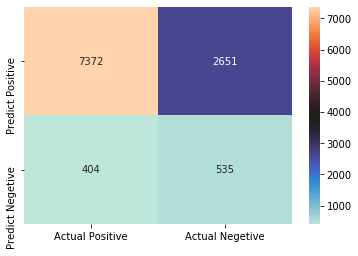

In [362]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [363]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     10023
           1       0.17      0.57      0.26       939

    accuracy                           0.72     10962
   macro avg       0.56      0.65      0.54     10962
weighted avg       0.88      0.72      0.78     10962



# Feature selection

In [364]:
gnb.fit(x_train_res[columns_res],y_train_res)

GaussianNB()

In [365]:
y_pred=gnb.predict(x_test[columns_res])

In [366]:
print((metrics.f1_score(y_test,y_pred)))

0.3014851485148515


In [367]:
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,7531,2492
Predict Negetive,330,609


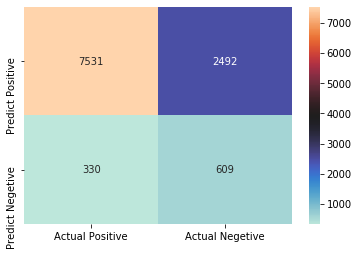

In [368]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [369]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     10023
           1       0.20      0.65      0.30       939

    accuracy                           0.74     10962
   macro avg       0.58      0.70      0.57     10962
weighted avg       0.89      0.74      0.80     10962



# setting threshold

In [370]:
probs=gnb.predict_proba(x_test[columns_res])
print(probs[:,1])

[0.11914956 0.39903639 0.12260567 ... 1.         0.58115537 0.18855408]


In [371]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.7990503099527104


Text(0.5, 0, 'FPR')

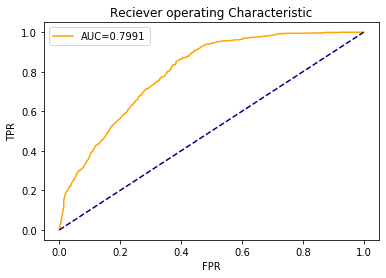

In [372]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

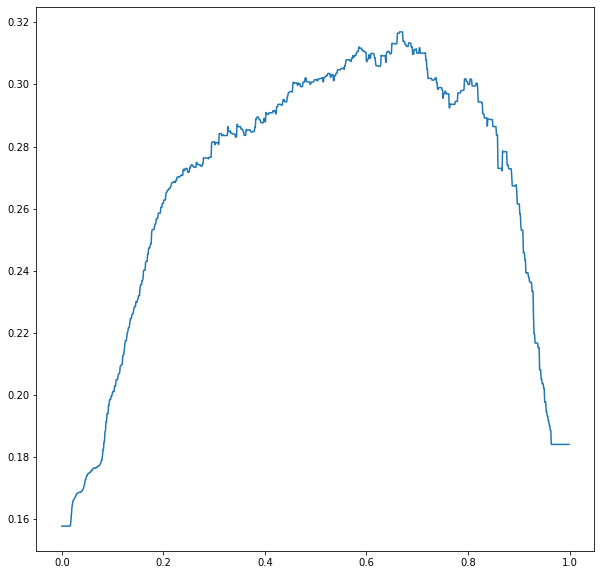

In [373]:
f1=[]
x=np.arange(start=0, stop=1, step=.001)
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(gnb.predict_proba(x_test[columns_res])[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [374]:
l=np.array(f1).max()
n=f1.index(l)
THRESHOLD=(n)*0.001
preds = np.where(gnb.predict_proba(x_test[columns_res])[:,1] > THRESHOLD, 1, 0)

In [375]:
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
cm_matrix

,Actual Positive,Actual Negetive
Predict Positive,8843,1180
Predict Negetive,540,399


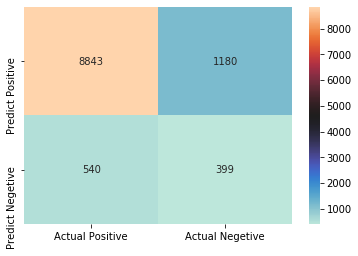

In [376]:
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [377]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10023
           1       0.25      0.42      0.32       939

    accuracy                           0.84     10962
   macro avg       0.60      0.65      0.61     10962
weighted avg       0.88      0.84      0.86     10962



# XG boost 

# Imbalanced Dataset

# Without feature selection

In [378]:
import xgboost as xgb 
my_model = xgb.XGBClassifier(random_state=0,n_jobs=-1,learning_rate=0.15,max_depth=5,min_child_width=1,gamma=0,colsample_bytree=0.7) 

In [379]:
my_model.fit(x_train,y_train)

[02:31:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_child_width } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_child_width=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [380]:
pred=my_model.predict(x_test)

In [381]:
from sklearn import metrics
metrics.f1_score(y_test,pred)

0.498422712933754

                  Actual Positive  Actual Negetive
Predict Positive            10010               13
Predict Negetive              623              316


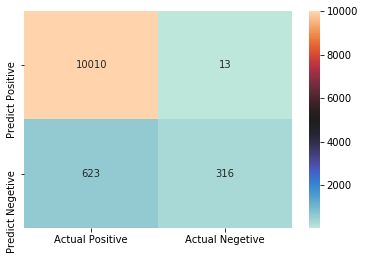

In [382]:
cm=(metrics.confusion_matrix(y_test,pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [383]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10023
           1       0.96      0.34      0.50       939

    accuracy                           0.94     10962
   macro avg       0.95      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



# Setting Threshold

In [384]:
probs=my_model.predict_proba(x_test)
print(probs[:,1])

[0.00266793 0.13340916 0.01704249 ... 0.07795338 0.0818854  0.14378595]


In [385]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9099827053793316


Text(0.5, 0, 'FPR')

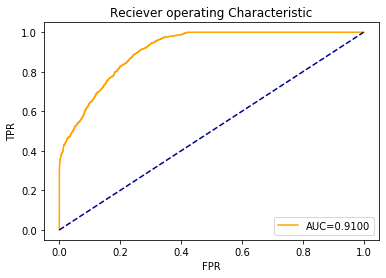

In [386]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

In [387]:
f1=[]
for i in range(0,1000):
    preds=np.where(my_model.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))

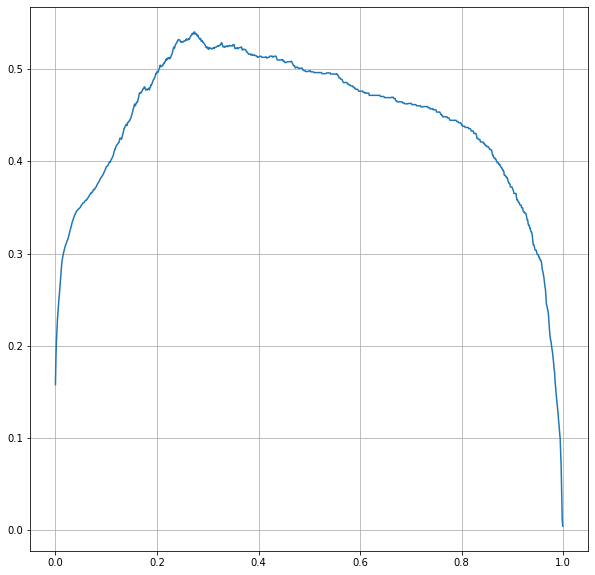

In [388]:
plt.figure(figsize=(10,10))
plt.grid()
x=np.arange(0,1,0.001)
plt.plot(x,f1)

In [389]:
l=np.array(f1).max()
n=f1.index(l)

In [390]:
THRESHOLD=n*0.001
preds = np.where(my_model.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10023
           1       0.73      0.43      0.54       939

    accuracy                           0.94     10962
   macro avg       0.84      0.71      0.75     10962
weighted avg       0.93      0.94      0.93     10962

                  Actual Positive  Actual Negetive
Predict Positive             9874              149
Predict Negetive              536              403


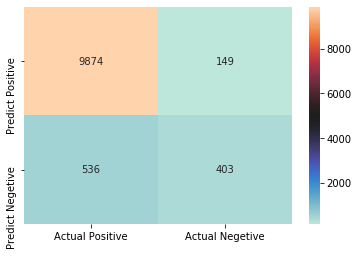

In [391]:
print(metrics.classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [392]:
metrics.f1_score(y_test,preds)

0.5405767940979208

# with feature selection

In [393]:
import xgboost as xgb 
my_model = xgb.XGBClassifier(random_state=0,n_jobs=-1) 
my_model.fit(x_train,y_train)
feature_imp=pd.Series(my_model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

KPIs_met >80%                   0.170565
department_Sales & Marketing    0.103611
department_Operations           0.095564
awards_won?                     0.058497
department_Finance              0.057794
department_Procurement          0.056032
department_HR                   0.035024
avg_training_score              0.031510
department_Technology           0.029604
department_Legal                0.027562
department_R&D                  0.019425
previous_year_rating            0.018723
region_region_23                0.011811
region_region_30                0.011437
region_region_29                0.010566
region_region_25                0.010522
region_region_27                0.010144
region_region_22                0.009993
region_region_7                 0.009935
region_region_17                0.009919
region_region_4                 0.009833
gender_m                        0.008966
region_region_28                0.008630
recruitment_channel_referred    0.008321
region_region_3 

Text(0.5, 0, 'Feature Important Scores')

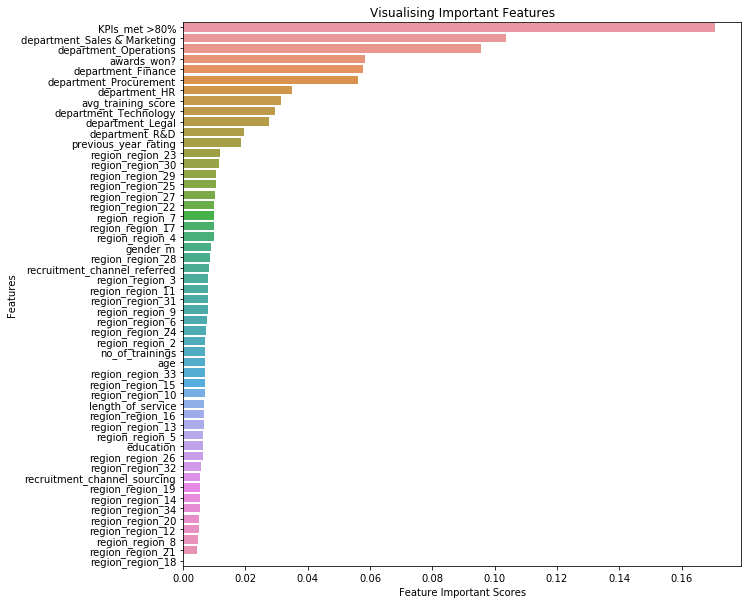

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(feature_imp,feature_imp.index)
plt.title("Visualising Important Features")
plt.ylabel("Features")
plt.xlabel("Feature Important Scores")

In [395]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(my_model,threshold=0.008)

In [396]:
x_imp_train=feat_sel.fit_transform(x_train,y_train)
x_imp_test=feat_sel.transform(x_test)

In [397]:
my_model.fit(x_imp_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [398]:
y_pred=my_model.predict(x_imp_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10023
           1       0.90      0.36      0.51       939

    accuracy                           0.94     10962
   macro avg       0.92      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962

                  Actual Positive  Actual Negetive
Predict Positive             9987               36
Predict Negetive              602              337


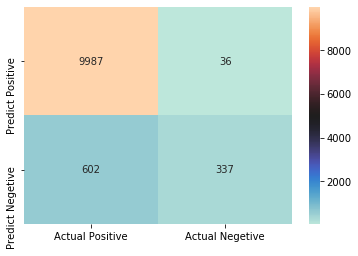

In [399]:
print(metrics.classification_report(y_test,y_pred))
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [400]:
metrics.f1_score(y_test,y_pred)

0.513719512195122

# setting threshold

In [401]:
probs=my_model.predict_proba(x_imp_test)
print(probs[:,1])

[0.00034052 0.22378501 0.00266123 ... 0.14389826 0.07637177 0.3248472 ]


In [402]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9058851542410922


Text(0.5, 0, 'FPR')

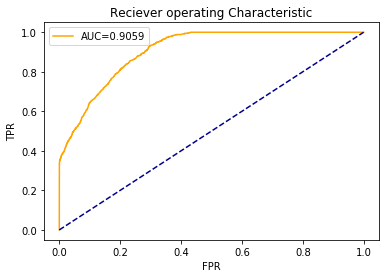

In [403]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

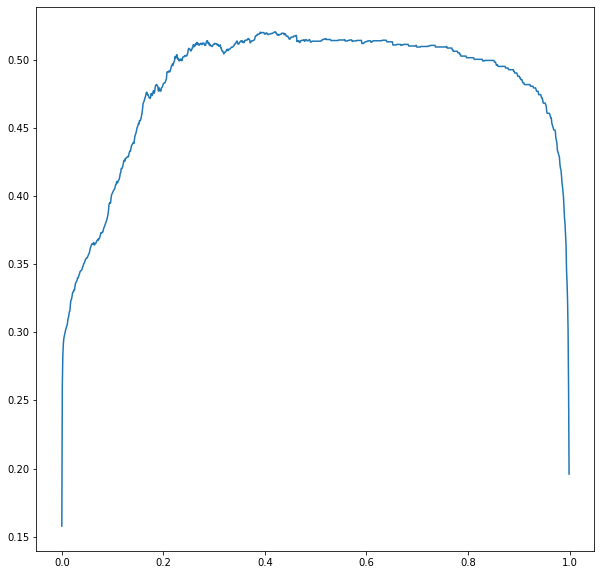

In [404]:
f1=[]
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(my_model.predict_proba(x_imp_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [405]:
l=np.array(f1).max()
n=f1.index(l)

In [406]:
THRESHOLD=n*0.001
preds = np.where(my_model.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10023
           1       0.84      0.38      0.52       939

    accuracy                           0.94     10962
   macro avg       0.89      0.69      0.74     10962
weighted avg       0.94      0.94      0.93     10962

                  Actual Positive  Actual Negetive
Predict Positive             9953               70
Predict Negetive              584              355


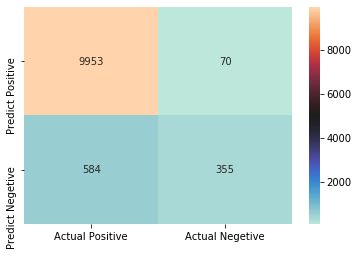

In [407]:
print(metrics.classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [408]:
metrics.f1_score(y_test,preds)

0.5205278592375366

# Balanced Dataset

# Without feature selection

In [409]:
import xgboost as xgb 
my_model = xgb.XGBClassifier(random_state=0,n_jobs=-1) 

In [410]:
my_model.fit(x_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [411]:
pred=my_model.predict(x_test)

In [412]:
metrics.f1_score(y_test,pred)

0.37047756874095517

                  Actual Positive  Actual Negetive
Predict Positive             7584             2439
Predict Negetive              171              768


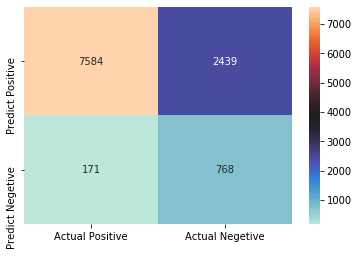

In [413]:
cm=(metrics.confusion_matrix(y_test,pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [414]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85     10023
           1       0.24      0.82      0.37       939

    accuracy                           0.76     10962
   macro avg       0.61      0.79      0.61     10962
weighted avg       0.91      0.76      0.81     10962



# Setting Threshold

In [415]:
probs=my_model.predict_proba(x_test)
print(probs[:,1])

[0.00176747 0.75372446 0.1162248  ... 0.17543833 0.4476945  0.99040437]


In [416]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8793307873254669


Text(0.5, 0, 'FPR')

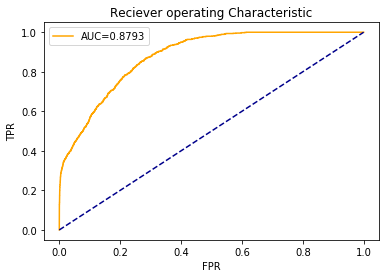

In [417]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

In [418]:
f1=[]
for i in range(0,1000):
    preds=np.where(my_model.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))

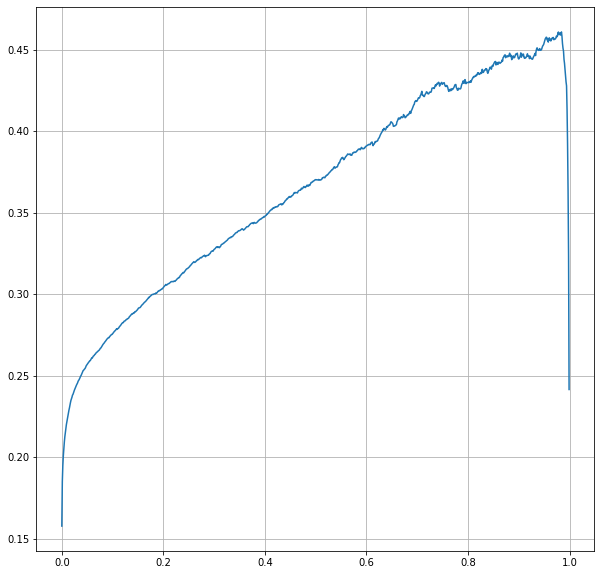

In [419]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(x,f1)

In [420]:
l=np.array(f1).max()
n=f1.index(l)

In [421]:
THRESHOLD=n*0.001
preds = np.where(my_model.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10023
           1       0.70      0.34      0.46       939

    accuracy                           0.93     10962
   macro avg       0.82      0.67      0.71     10962
weighted avg       0.92      0.93      0.92     10962

                  Actual Positive  Actual Negetive
Predict Positive             9884              139
Predict Negetive              616              323


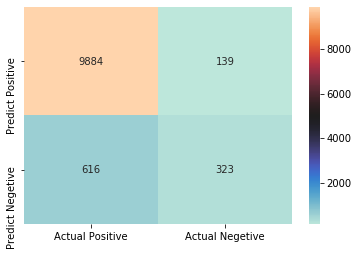

In [422]:
print(metrics.classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [423]:
metrics.f1_score(y_test,preds)

0.4610992148465382

# with feature selection

In [424]:
feature_imp=pd.Series(my_model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

department_Sales & Marketing    0.142270
KPIs_met >80%                   0.140819
department_Operations           0.049738
department_Procurement          0.048394
awards_won?                     0.045001
department_HR                   0.042343
avg_training_score              0.042067
previous_year_rating            0.034692
department_Finance              0.029394
department_Technology           0.021001
department_Legal                0.017887
region_region_4                 0.014022
region_region_5                 0.013319
region_region_32                0.013136
region_region_21                0.012569
region_region_29                0.012543
region_region_6                 0.011836
region_region_31                0.011255
region_region_11                0.011243
region_region_20                0.011180
region_region_8                 0.011179
region_region_24                0.010650
region_region_30                0.010630
region_region_25                0.010444
recruitment_chan

Text(0.5, 0, 'Feature Important Scores')

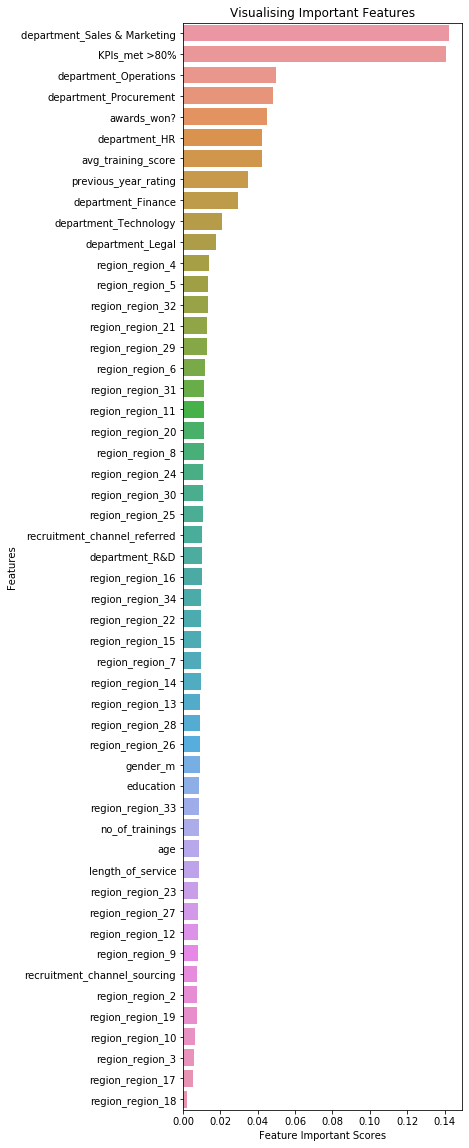

In [425]:
plt.figure(figsize=(5,20))
sns.barplot(feature_imp,feature_imp.index)
plt.title("Visualising Important Features")
plt.ylabel("Features")
plt.xlabel("Feature Important Scores")

In [426]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(my_model,threshold=0.001)

In [427]:
x_imp_train=feat_sel.fit_transform(x_train_res,y_train_res)
x_imp_test=feat_sel.transform(x_test)

In [428]:
my_model.fit(x_imp_train,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [429]:
y_pred=my_model.predict(x_imp_test)

              precision    recall  f1-score   support

           0       0.98      0.76      0.85     10023
           1       0.24      0.82      0.37       939

    accuracy                           0.76     10962
   macro avg       0.61      0.79      0.61     10962
weighted avg       0.91      0.76      0.81     10962

                  Actual Positive  Actual Negetive
Predict Positive             7584             2439
Predict Negetive              171              768


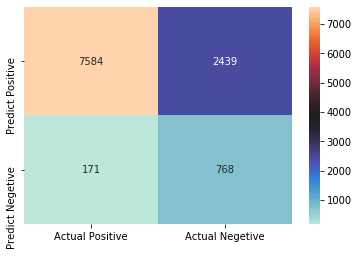

In [430]:
print(metrics.classification_report(y_test,y_pred))
cm=(metrics.confusion_matrix(y_test,y_pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

# setting threshold

In [431]:
probs=my_model.predict_proba(x_imp_test)
print(probs[:,1])

[0.00176747 0.75372446 0.1162248  ... 0.17543833 0.4476945  0.99040437]


In [432]:
prob_positive=probs[:,1]
from sklearn import metrics
fpr,tpr,thres=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8793307873254669


Text(0.5, 0, 'FPR')

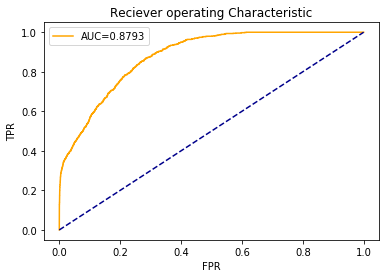

In [433]:
import matplotlib.pyplot as plt
plt.title("Reciever operating Characteristic")
plt.plot(fpr,tpr,"orange",label="AUC=%0.4f" % roc_auc)
plt.legend(loc="lowe right")
plt.plot([0,1],[0,1],color="darkblue",linestyle='--')
plt.ylabel("TPR")
plt.xlabel("FPR")

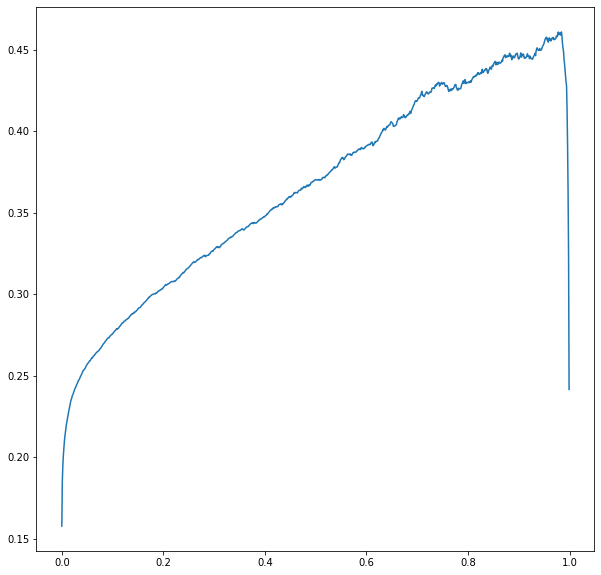

In [434]:
f1=[]
plt.figure(figsize=(10,10))
for i in range(0,1000):
    preds=np.where(my_model.predict_proba(x_imp_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))
plt.plot(x,f1)

In [435]:
l=np.array(f1).max()
n=f1.index(l)

In [436]:

THRESHOLD=n*0.001

preds = np.where(my_model.predict_proba(x_imp_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10023
           1       0.70      0.34      0.46       939

    accuracy                           0.93     10962
   macro avg       0.82      0.67      0.71     10962
weighted avg       0.92      0.93      0.92     10962

                  Actual Positive  Actual Negetive
Predict Positive             9884              139
Predict Negetive              616              323


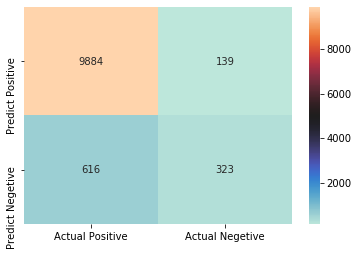

In [437]:
print(metrics.classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [438]:
metrics.f1_score(y_test,preds)

0.4610992148465382

# Test Dataset

In [439]:
promotion_test

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,1,24,NaN,1,1,0,77,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1.0,1,31,3.0,5,0,0,51,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1.0,1,31,1.0,4,0,0,47,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,3,31,2.0,9,0,0,65,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,30,4.0,7,0,0,61,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.0,1,24,3.0,1,0,0,61,0,0,...,0,0,0,0,0,0,0,1,0,1
23486,1.0,1,31,3.0,7,0,0,74,0,0,...,0,0,0,0,0,0,0,1,0,1
23487,1.0,1,26,4.0,4,0,0,50,0,1,...,0,0,0,0,0,0,0,0,0,1
23488,1.0,3,27,NaN,1,0,0,70,0,0,...,0,0,0,0,0,0,0,1,0,1


# Handling Missing Values

In [440]:
promotion_train.isnull().sum()

education                       2409
no_of_trainings                    0
age                                0
previous_year_rating            4124
length_of_service                  0
KPIs_met >80%                      0
awards_won?                        0
avg_training_score                 0
is_promoted                        0
department_Finance                 0
department_HR                      0
department_Legal                   0
department_Operations              0
department_Procurement             0
department_R&D                     0
department_Sales & Marketing       0
department_Technology              0
region_region_10                   0
region_region_11                   0
region_region_12                   0
region_region_13                   0
region_region_14                   0
region_region_15                   0
region_region_16                   0
region_region_17                   0
region_region_18                   0
region_region_19                   0
r

In [441]:
promotion_test["education"].value_counts()

1.0    15578
2.0     6504
0.0      374
Name: education, dtype: int64

In [442]:
promotion_test["previous_year_rating"].value_counts()

3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

In [443]:
promotion_test["education"]=promotion_test["education"].replace({
    np.NaN:1
})
promotion_test["previous_year_rating"]=promotion_test["previous_year_rating"].replace({
    np.NaN:3
})

In [444]:
promotion_test.isnull().sum()

education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_

# Scaling of test data

In [445]:
from sklearn.preprocessing import StandardScaler

In [446]:
columns1=promotion_test.columns
scaler = StandardScaler()
promotion_test=pd.DataFrame(scaler.fit_transform(promotion_test))
promotion_test.columns=columns1

# Training the final best model and Testing the final test data

In [447]:
import xgboost as xgb 
my_model = xgb.XGBClassifier(random_state=0,n_jobs=-1,learning_rate=0.15,max_depth=5,min_child_width=1,gamma=0,colsample_bytree=0.7) 

In [448]:
my_model.fit(x_train,y_train)

[02:38:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_child_width } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_child_width=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [449]:
pred=my_model.predict(x_test)

In [450]:
metrics.f1_score(y_test,pred)

0.498422712933754

                  Actual Positive  Actual Negetive
Predict Positive            10010               13
Predict Negetive              623              316


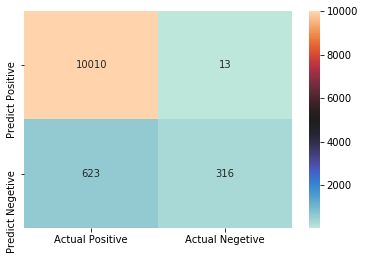

In [451]:
cm=(metrics.confusion_matrix(y_test,pred))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [452]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10023
           1       0.96      0.34      0.50       939

    accuracy                           0.94     10962
   macro avg       0.95      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



In [453]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10023
           1       0.96      0.34      0.50       939

    accuracy                           0.94     10962
   macro avg       0.95      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



# setting threshold

In [454]:
probs=my_model.predict_proba(x_test)
print(probs[:,1])

[0.00266793 0.13340916 0.01704249 ... 0.07795338 0.0818854  0.14378595]


In [455]:
f1=[]
for i in range(0,1000):
    preds=np.where(my_model.predict_proba(x_test)[:,1] >.001*i, 1, 0)
    f1.append(metrics.f1_score(y_test,preds))

274

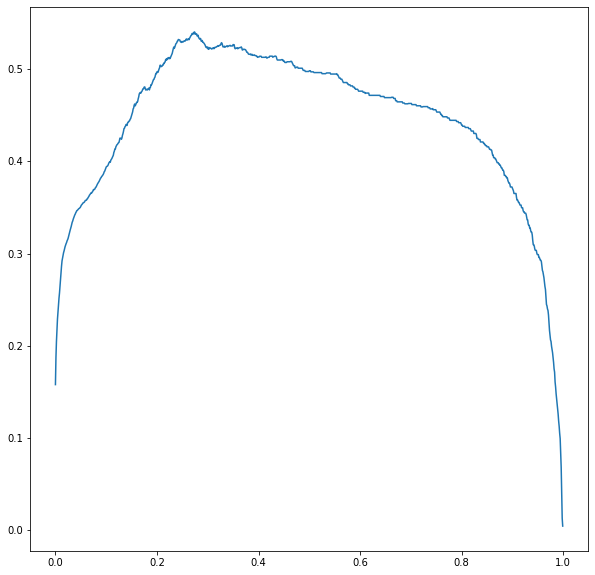

In [456]:
plt.figure(figsize=(10,10))
l=np.array(f1).max()
n=f1.index(l)
plt.plot(x,f1)
n

In [457]:
THRESHOLD=n*0.001
preds = np.where(my_model.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10023
           1       0.73      0.43      0.54       939

    accuracy                           0.94     10962
   macro avg       0.84      0.71      0.75     10962
weighted avg       0.93      0.94      0.93     10962

                  Actual Positive  Actual Negetive
Predict Positive             9874              149
Predict Negetive              536              403


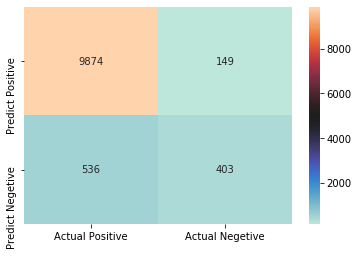

In [458]:
print(metrics.classification_report(y_test,preds))
cm=(metrics.confusion_matrix(y_test,preds))
cm_matrix=pd.DataFrame(cm,columns=["Actual Positive","Actual Negetive"],index=["Predict Positive","Predict Negetive"])
print(cm_matrix)
sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="icefire")

In [459]:
metrics.f1_score(y_test,preds)

0.5405767940979208

# Predicting the data 

In [460]:
THRESHOLD=n*0.001
preds = np.where(my_model.predict_proba(promotion_test)[:,1] > THRESHOLD, 1, 0)

In [461]:
pd.DataFrame(preds,columns=["is_promoted"])["is_promoted"].value_counts()

0    22369
1     1121
Name: is_promoted, dtype: int64

In [462]:
final_predictions=pd.concat([employee_id_test,pd.DataFrame(preds,columns=["is_promoted"])],axis=1)

In [463]:
final_predictions.to_csv('D:\promotion_predictions.csv', index=False)

# Conclusion